In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# from sklearn.datasets import make_regression
%matplotlib inline
import seaborn as sns

In [40]:
dataset = pd.read_csv("/kaggle/input/dataset/weatherdata (1).csv")
dataset


,Unnamed: 0,Station,Year,Month,Max Temp,Min Temp,Rainfall(mm),Humidity (percent),Wind Speed (m/s),Cloud Coverage (Octs),Sunshine (Hours),Station Number
0,0,Barisal,1949,1,29.40,12.30,0.0,68.00,0.453704,0.60,7.831915,41950
1,1,Barisal,1949,2,33.90,15.20,9.0,63.00,0.659259,0.90,8.314894,41950
2,2,Barisal,1949,3,36.70,20.20,8.0,59.00,1.085185,1.50,8.131915,41950
3,3,Barisal,1949,4,33.90,23.90,140.0,71.00,1.772222,3.90,8.219149,41950
4,4,Barisal,1949,5,35.60,25.00,217.0,76.00,1.703704,4.10,7.046809,41950
...,...,...,...,...,...,...,...,...,...,...,...,...
24863,24863,Teknaf,2022,8,31.75,25.49,529.0,86.16,1.580000,6.29,5.450000,41998
24864,24864,Teknaf,2022,9,31.51,25.84,443.0,86.33,1.530000,6.33,4.400000,41998
24865,24865,Teknaf,2022,10,32.40,25.55,174.0,83.23,1.970000,2.77,7.680000,41998
24866,24866,Teknaf,2022,11,31.58,20.63,27.0,77.37,1.530000,0.33,9.290000,41998


In [41]:
dataset = dataset.sort_values(by='Year', ascending=True)
dataset = dataset.reset_index()


dataset = dataset.drop(columns=['Station', 'Year', 'Unnamed: 0', 'index'])
dataset

,Month,Max Temp,Min Temp,Rainfall(mm),Humidity (percent),Wind Speed (m/s),Cloud Coverage (Octs),Sunshine (Hours),Station Number
0,7,33.10,26.40,363.71875,86.1875,1.577778,6.20,4.435849,41883
1,9,33.30,25.90,120.00000,85.0000,1.107407,3.20,4.906667,41947
2,8,32.50,26.20,112.00000,83.0000,1.583333,2.90,4.363333,41947
3,7,33.10,26.10,317.00000,86.0000,1.596296,3.40,3.890000,41947
4,6,35.30,26.10,68.00000,82.0000,1.720370,3.10,4.546667,41947
...,...,...,...,...,...,...,...,...,...
24863,4,31.38,22.53,196.00000,80.7300,6.560000,5.67,3.450000,41858
24864,5,33.06,23.66,290.00000,79.1000,6.100000,5.06,4.060000,41858
24865,6,32.37,25.09,376.00000,82.6000,6.240000,6.67,1.990000,41858
24866,8,34.74,26.78,191.00000,79.3500,6.550000,5.26,5.620000,41858


## EDA & Feature Engineering

In [42]:
#Checking Correlation of features with rainfall
dataset.corr() ['Rainfall(mm)']

Month                    0.134075
Max Temp                 0.252896
Min Temp                 0.593586
Rainfall(mm)             1.000000
Humidity (percent)       0.586717
Wind Speed (m/s)         0.278844
Cloud Coverage (Octs)    0.765847
Sunshine (Hours)        -0.659479
Station Number           0.116388
Name: Rainfall(mm), dtype: float64

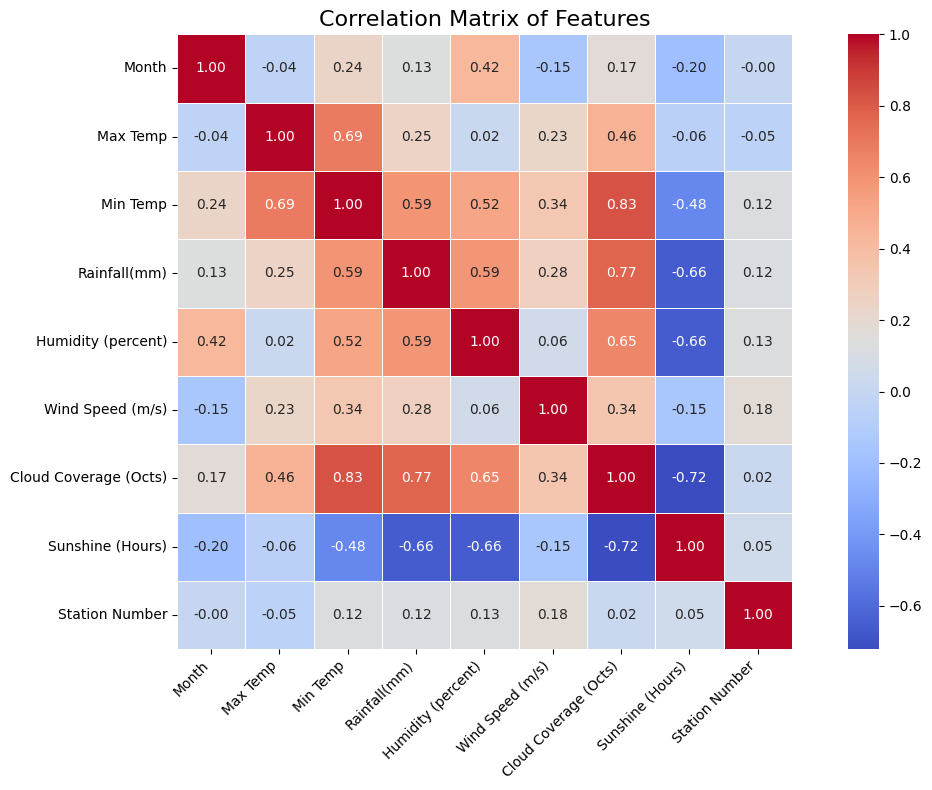

In [43]:
correlation_matrix = dataset.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True, linewidths=0.5)

# Add titles and labels for clarity
plt.title('Correlation Matrix of Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

In [44]:
#Checking null values in dataset
dataset. isnull().sum()

Month                    0
Max Temp                 0
Min Temp                 0
Rainfall(mm)             0
Humidity (percent)       0
Wind Speed (m/s)         0
Cloud Coverage (Octs)    0
Sunshine (Hours)         0
Station Number           0
dtype: int64

In [45]:
dataset.columns

Index(['Month', 'Max Temp', 'Min Temp', 'Rainfall(mm)', 'Humidity (percent)',
       'Wind Speed (m/s)', 'Cloud Coverage (Octs)', 'Sunshine (Hours)',
       'Station Number'],
      dtype='object')

In [46]:
#Removing Outliars
from scipy import stats
dataset = dataset[(np.abs(stats.zscore(dataset)) < 3).all(axis=1)]
dataset = dataset.reset_index(drop = True)
dataset

,Month,Max Temp,Min Temp,Rainfall(mm),Humidity (percent),Wind Speed (m/s),Cloud Coverage (Octs),Sunshine (Hours),Station Number
0,7,33.10,26.40,363.71875,86.1875,1.577778,6.20,4.435849,41883
1,9,33.30,25.90,120.00000,85.0000,1.107407,3.20,4.906667,41947
2,8,32.50,26.20,112.00000,83.0000,1.583333,2.90,4.363333,41947
3,7,33.10,26.10,317.00000,86.0000,1.596296,3.40,3.890000,41947
4,6,35.30,26.10,68.00000,82.0000,1.720370,3.10,4.546667,41947
...,...,...,...,...,...,...,...,...,...
23675,5,33.50,25.44,217.00000,75.3900,2.970000,5.45,4.300000,41923
23676,4,34.10,25.98,106.00000,72.0000,3.100000,5.23,5.960000,41923
23677,2,27.15,16.08,20.00000,62.7100,2.660000,2.29,6.180000,41923
23678,1,25.15,15.34,12.00000,71.8700,2.090000,2.65,3.810000,41923


In [47]:
dataset.isnull().sum() 

Month                    0
Max Temp                 0
Min Temp                 0
Rainfall(mm)             0
Humidity (percent)       0
Wind Speed (m/s)         0
Cloud Coverage (Octs)    0
Sunshine (Hours)         0
Station Number           0
dtype: int64

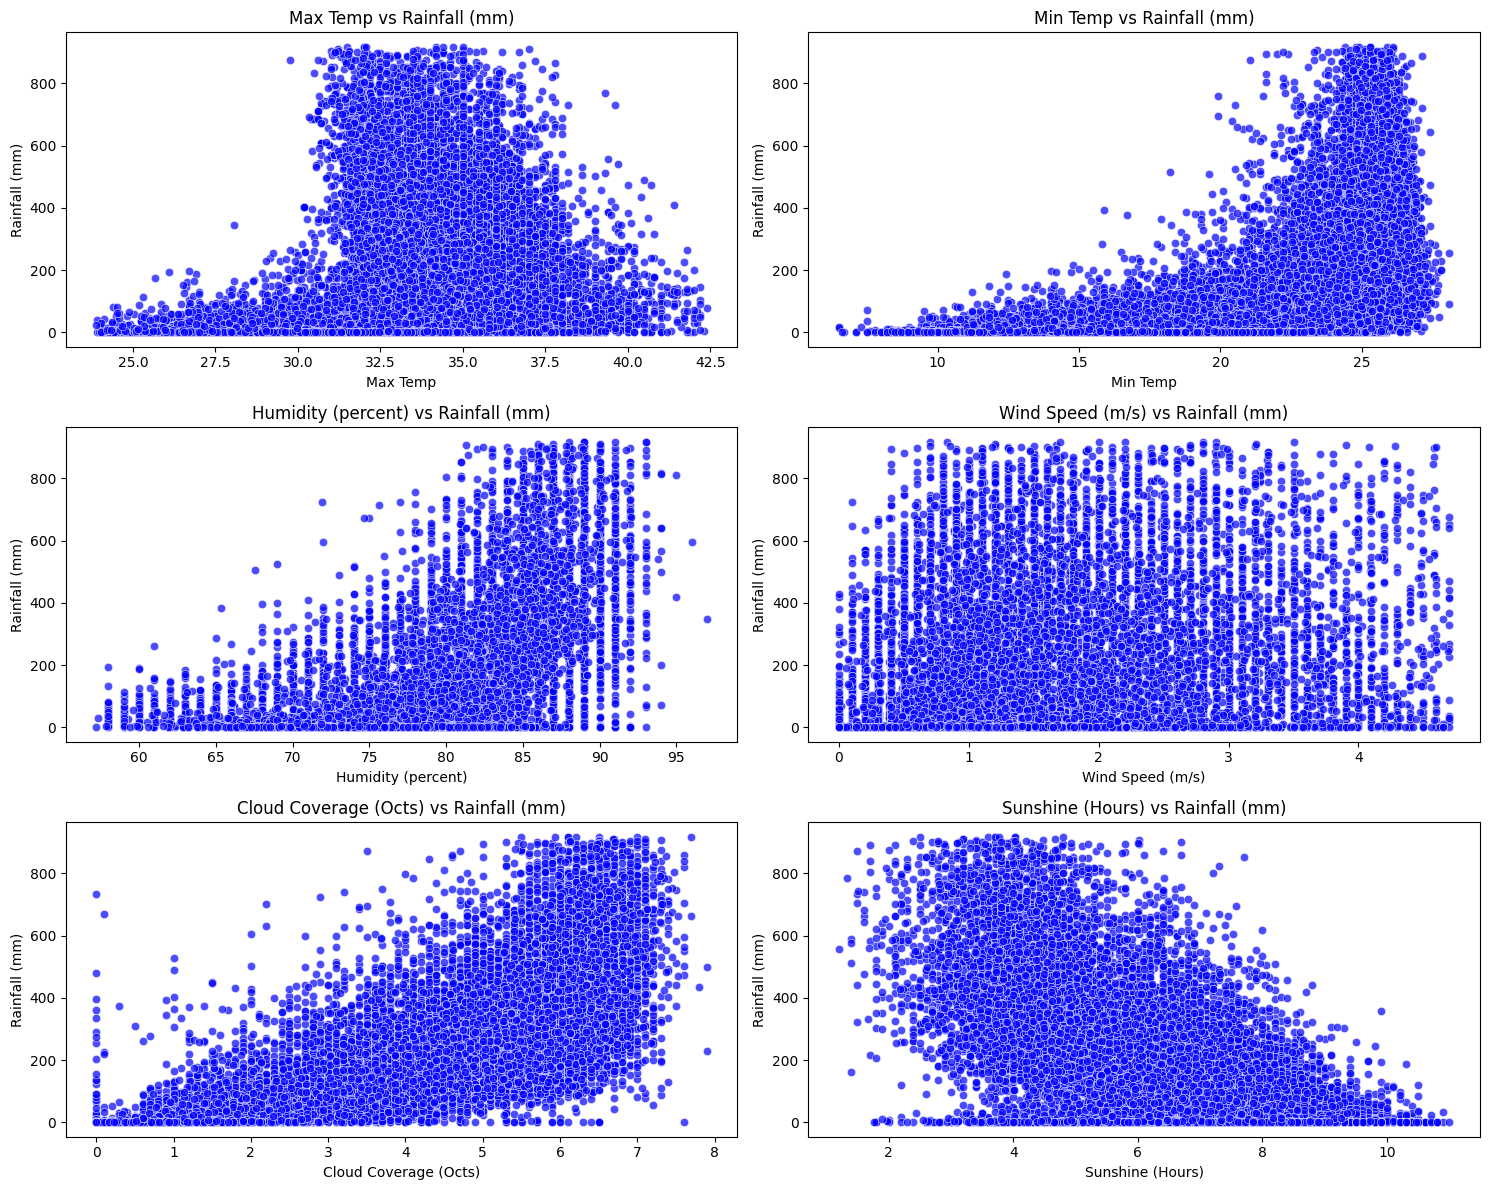

In [48]:
# List of columns to plot against 'Rainfall(mm)'
columns = ['Max Temp', 'Min Temp', 'Humidity (percent)', 'Wind Speed (m/s)', 'Cloud Coverage (Octs)', 'Sunshine (Hours)']

# Set up the figure for subplots
plt.figure(figsize=(15, 12))

# Loop through the columns and create subplots
for i, col in enumerate(columns, 1):
    plt.subplot(3, 2, i)  # 3 rows, 2 columns of subplots
    sns.scatterplot(data=dataset, x=col, y='Rainfall(mm)', alpha=0.7, color='blue')
    plt.title(f'{col} vs Rainfall (mm)', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Rainfall (mm)', fontsize=10)

# Adjust layout to avoid overlapping
plt.tight_layout()
# plt.savefig('rainfall_relationships.png', dpi=300)  # Save as PNG with high resolution (300 DPI)
plt.show()

# Data Normalization

In [49]:
D = dataset
D

,Month,Max Temp,Min Temp,Rainfall(mm),Humidity (percent),Wind Speed (m/s),Cloud Coverage (Octs),Sunshine (Hours),Station Number
0,7,33.10,26.40,363.71875,86.1875,1.577778,6.20,4.435849,41883
1,9,33.30,25.90,120.00000,85.0000,1.107407,3.20,4.906667,41947
2,8,32.50,26.20,112.00000,83.0000,1.583333,2.90,4.363333,41947
3,7,33.10,26.10,317.00000,86.0000,1.596296,3.40,3.890000,41947
4,6,35.30,26.10,68.00000,82.0000,1.720370,3.10,4.546667,41947
...,...,...,...,...,...,...,...,...,...
23675,5,33.50,25.44,217.00000,75.3900,2.970000,5.45,4.300000,41923
23676,4,34.10,25.98,106.00000,72.0000,3.100000,5.23,5.960000,41923
23677,2,27.15,16.08,20.00000,62.7100,2.660000,2.29,6.180000,41923
23678,1,25.15,15.34,12.00000,71.8700,2.090000,2.65,3.810000,41923


In [50]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()



In [51]:
# Remove the rainfall from the data
rainfall = pd.DataFrame(D['Rainfall(mm)'], columns=['Rainfall(mm)'])
data = D.drop(columns=['Rainfall(mm)'])

scaler = StandardScaler()


A = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
rainfall_scaled = pd.DataFrame(scaler.fit_transform(rainfall), columns=rainfall.columns)

# Add the rainfall data as a new column in the scaled data
A['Rainfall(mm)'] = rainfall['Rainfall(mm)']

# View the final scaled data with the Rainfall column
A

,Month,Max Temp,Min Temp,Humidity (percent),Wind Speed (m/s),Cloud Coverage (Octs),Sunshine (Hours),Station Number,Rainfall(mm)
0,0.127604,0.004006,1.049994,0.945139,0.201132,1.338665,-1.143048,-1.395354,363.71875
1,0.701517,0.070202,0.949524,0.772700,-0.308665,-0.117868,-0.864642,0.352242,120.00000
2,0.414560,-0.194582,1.009806,0.482278,0.207154,-0.263521,-1.185928,0.352242,112.00000
3,0.127604,0.004006,0.989712,0.917912,0.221203,-0.020765,-1.465822,0.352242,317.00000
4,-0.159353,0.732164,0.989712,0.337066,0.355677,-0.166419,-1.077519,0.352242,68.00000
...,...,...,...,...,...,...,...,...,...
23675,-0.446310,0.136398,0.857091,-0.622782,1.710053,0.974532,-1.223379,-0.303107,217.00000
23676,-0.733267,0.334987,0.965599,-1.115048,1.850950,0.867719,-0.241781,-0.303107,106.00000
23677,-1.307180,-1.965330,-1.023714,-2.464063,1.374068,-0.559682,-0.111690,-0.303107,20.00000
23678,-1.594137,-2.627292,-1.172411,-1.133926,0.756290,-0.384898,-1.513128,-0.303107,12.00000


In [52]:
A.isnull().sum()

Month                    0
Max Temp                 0
Min Temp                 0
Humidity (percent)       0
Wind Speed (m/s)         0
Cloud Coverage (Octs)    0
Sunshine (Hours)         0
Station Number           0
Rainfall(mm)             0
dtype: int64

In [53]:
data = dataset
dataset = A
dataset

,Month,Max Temp,Min Temp,Humidity (percent),Wind Speed (m/s),Cloud Coverage (Octs),Sunshine (Hours),Station Number,Rainfall(mm)
0,0.127604,0.004006,1.049994,0.945139,0.201132,1.338665,-1.143048,-1.395354,363.71875
1,0.701517,0.070202,0.949524,0.772700,-0.308665,-0.117868,-0.864642,0.352242,120.00000
2,0.414560,-0.194582,1.009806,0.482278,0.207154,-0.263521,-1.185928,0.352242,112.00000
3,0.127604,0.004006,0.989712,0.917912,0.221203,-0.020765,-1.465822,0.352242,317.00000
4,-0.159353,0.732164,0.989712,0.337066,0.355677,-0.166419,-1.077519,0.352242,68.00000
...,...,...,...,...,...,...,...,...,...
23675,-0.446310,0.136398,0.857091,-0.622782,1.710053,0.974532,-1.223379,-0.303107,217.00000
23676,-0.733267,0.334987,0.965599,-1.115048,1.850950,0.867719,-0.241781,-0.303107,106.00000
23677,-1.307180,-1.965330,-1.023714,-2.464063,1.374068,-0.559682,-0.111690,-0.303107,20.00000
23678,-1.594137,-2.627292,-1.172411,-1.133926,0.756290,-0.384898,-1.513128,-0.303107,12.00000


In [54]:
dataset.isnull().sum()

Month                    0
Max Temp                 0
Min Temp                 0
Humidity (percent)       0
Wind Speed (m/s)         0
Cloud Coverage (Octs)    0
Sunshine (Hours)         0
Station Number           0
Rainfall(mm)             0
dtype: int64

# Splitting the dataset

In [55]:
from sklearn.model_selection import train_test_split

In [56]:

#Splitting the dataset into training & testing data
x, y = dataset[['Month', 'Max Temp', 'Min Temp', 'Humidity (percent)',
       'Wind Speed (m/s)', 'Cloud Coverage (Octs)', 'Sunshine (Hours)',
       'Station Number']], dataset['Rainfall(mm)']



x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)


(18944, 8)
(4736, 8)


In [57]:
#saving the split data index
a = x_train.index
b = x_test.index
training_index = pd.DataFrame(a)
testing_index = pd.DataFrame(b)


# Multiple Linear Regression Model

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# define a fuction
Model_MLR=LinearRegression()
# fit the model with split dataset
Model_MLR.fit(x_train,y_train)

LinearRegression()

In [59]:
Model_MLR.coef_

array([ -6.53809284,   1.91662754,  -7.27743414,  27.56572659,
         6.16780127, 126.18362116, -32.35070506,  13.88228946])

In [60]:
Model_MLR_prediction_test = Model_MLR.predict(x_test)
Model_MLR_prediction_train = Model_MLR.predict(x_train)

# Multiple Linear Regression Model Accuracy Check

In [61]:
Model_MLR_rmse_train = np.sqrt(mean_squared_error(y_train, Model_MLR_prediction_train))
Model_MLR_rmse_train

118.47764508140533

In [62]:
Model_MLR_rmse_test = np.sqrt(mean_squared_error(y_test, Model_MLR_prediction_test))
Model_MLR_rmse_test

117.85320882744412

In [63]:
Model_MLR_r2_train = r2_score(y_train, Model_MLR_prediction_train)
Model_MLR_r2_train

0.6647755466306422

In [64]:
Model_MLR_r2_test = r2_score(y_test, Model_MLR_prediction_test)
Model_MLR_r2_test

0.6760961483007141

In [65]:
MLR_result_train = data.iloc[training_index[0]]
MLR_result_train = MLR_result_train.reset_index(drop = True)
MLR_result_train['Predicted Rainfall(mm)'] = pd.DataFrame(Model_MLR_prediction_train)

MLR_result_test = data.iloc[testing_index[0]]
MLR_result_test = MLR_result_test.reset_index(drop = True)
MLR_result_test['Predicted Rainfall(mm)'] = pd.DataFrame(Model_MLR_prediction_test)

In [66]:
# for plots
def plot_figure(dataset, train=True):
    plt.figure(figsize=(10, 8))
    plt.subplot(1, 2, 1)
    plt.scatter(dataset['Min Temp'],dataset['Rainfall(mm)'])
    plt.axis([0, 30, -100, 1000])
    if train:
        plt.title("Min Temp vs Actual Rainfall- Training")
    else:
        plt.title("Min Temp vs Actual Rainfall- Test")
    plt.xlabel("Min Temp")
    plt.ylabel("Actual Rainfall(mm)")
    plt.subplot(1, 2, 2)
    plt.scatter(dataset['Min Temp'],dataset['Predicted Rainfall(mm)'],color = "skyblue")
    plt.axis([0, 30, -100, 1000])
    if train:
        plt.title("Min Temp vs Predicted Rainfall- Training")
    else:
        plt.title("Min Temp vs Predicted Rainfall- Test")
    plt.xlabel("Min Temp")
    plt.ylabel("Predicted Rainfall(mm)")
    plt.show()
    

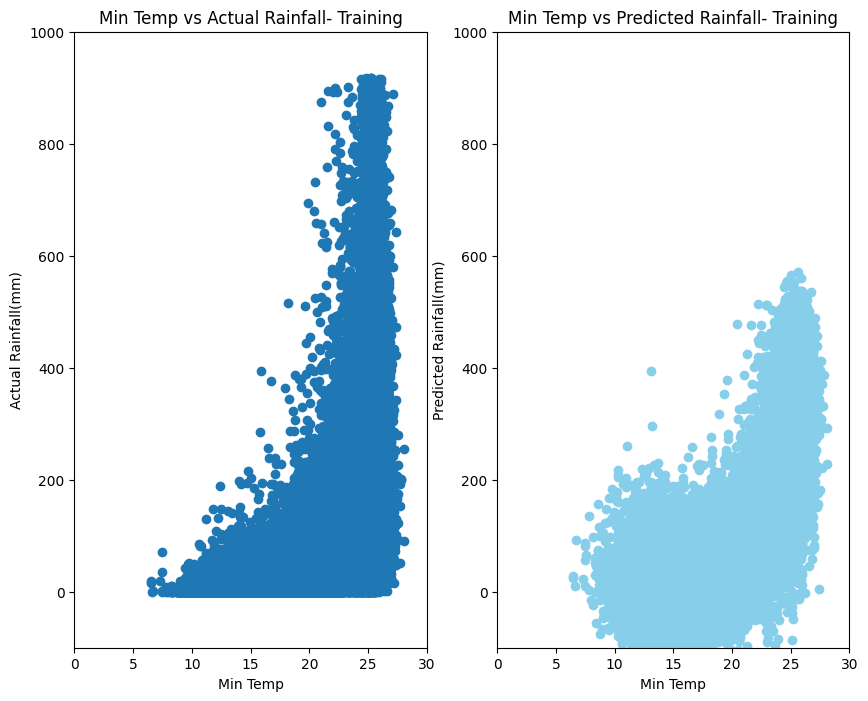

In [67]:
plot_figure(MLR_result_train)

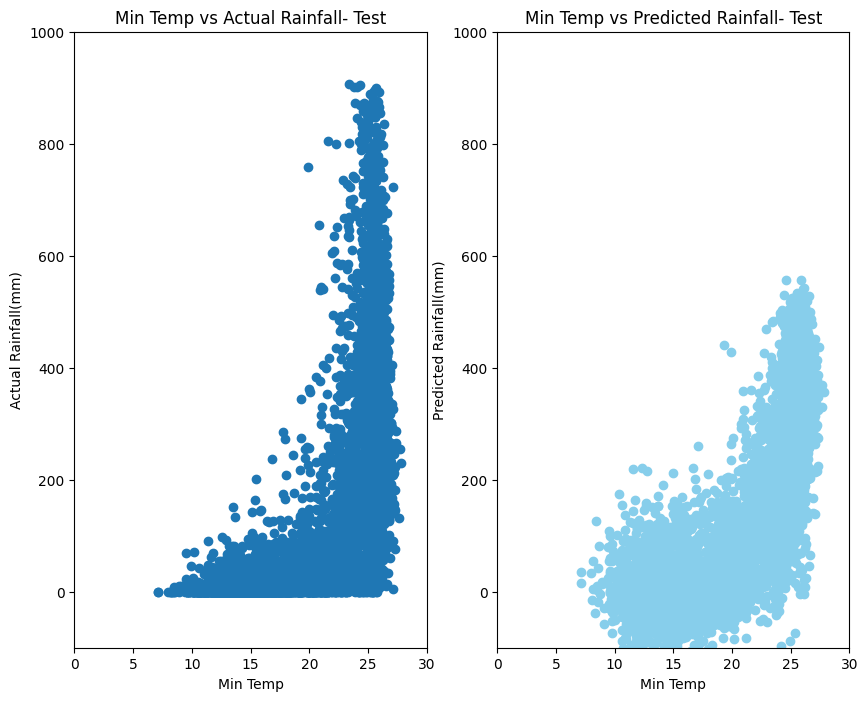

In [68]:
plot_figure(MLR_result_test, train = False)

# Polynomial Regression Model

In [69]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4, include_bias=True)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

In [70]:
Model_PLR = LinearRegression()
Model_PLR.fit(x_train_poly, y_train)

LinearRegression()

In [71]:
Model_PLR_prediction_test = Model_PLR.predict(x_test_poly)
Model_PLR_prediction_train = Model_PLR.predict(x_train_poly)

# Polynomial Regression Model Accuracy Check

In [72]:
Model_PLR_rmse_train = np.sqrt(mean_squared_error(y_train, Model_PLR_prediction_train))
Model_PLR_rmse_train

97.7413927676544

In [73]:
Model_PLR_rmse_test = np.sqrt(mean_squared_error(y_test, Model_PLR_prediction_test))
Model_PLR_rmse_test

97.32947599375233

In [74]:
Model_PLR_r2_train = r2_score(y_train, Model_PLR_prediction_train)
Model_PLR_r2_train

0.771850295289555

In [75]:
Model_PLR_r2_test = r2_score(y_test, Model_PLR_prediction_test)
Model_PLR_r2_test

0.7790866001560706

In [76]:
PLR_result_train = data.iloc[training_index[0]]
PLR_result_train = PLR_result_train.reset_index(drop = True)
PLR_result_train['Predicted Rainfall(mm)'] = pd.DataFrame(Model_PLR_prediction_train)

PLR_result_test = data.iloc[testing_index[0]]
PLR_result_test = PLR_result_test.reset_index(drop = True)
PLR_result_test['Predicted Rainfall(mm)'] = pd.DataFrame(Model_PLR_prediction_test)

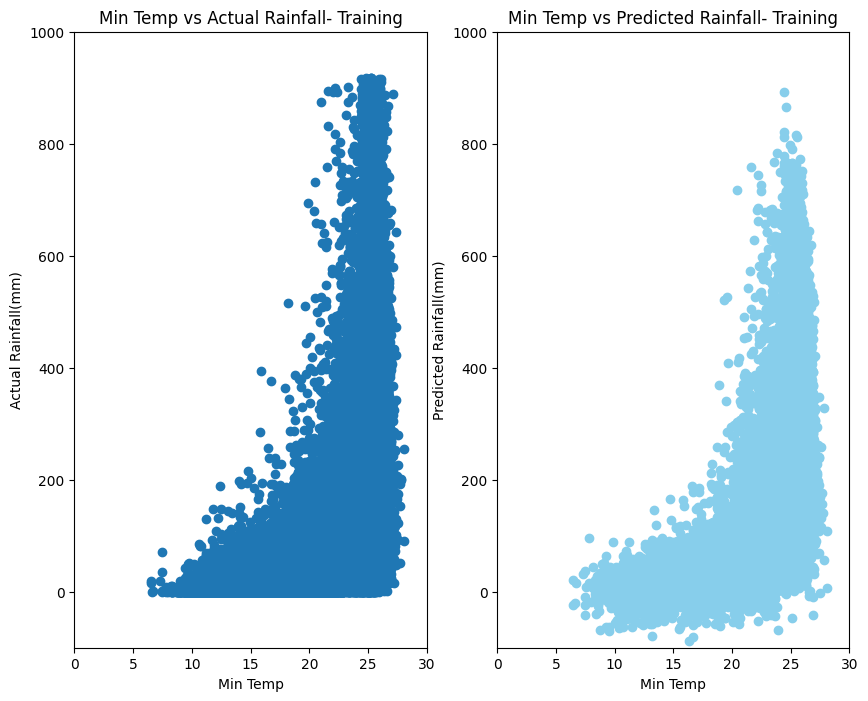

In [77]:
plot_figure(PLR_result_train)

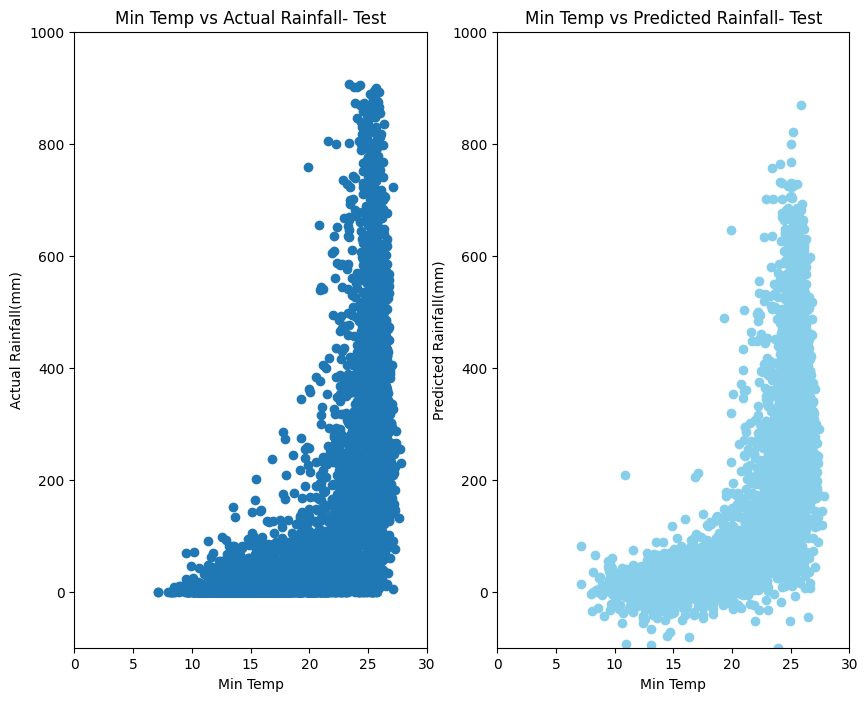

In [78]:
plot_figure(PLR_result_test, train=False)

# Decision Tree Model

In [79]:
from sklearn.tree import DecisionTreeRegressor # for building the model
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree

In [80]:
# Initializing the Decision Tree Regression model
Model_DT = DecisionTreeRegressor(criterion='squared_error',random_state = 0,max_depth= 7,splitter='best')
# Fitting the Decision Tree Regression model to the data
Model_DT.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=7, random_state=0)

In [81]:
Model_DT_prediction_test = Model_DT.predict(x_test)
Model_DT_prediction_train = Model_DT.predict(x_train)

# Decision Tree Model Accuracy Check

In [82]:
Model_DT_rmse_train = np.sqrt(mean_squared_error(y_train, Model_DT_prediction_train))
Model_DT_rmse_train

101.02801649860716

In [83]:
Model_DT_rmse_test = np.sqrt(mean_squared_error(y_test, Model_DT_prediction_test))
Model_DT_rmse_test

106.08599377700592

In [84]:
Model_DT_r2_train = r2_score(y_train, Model_DT_prediction_train)
Model_DT_r2_train

0.7562489374434993

In [85]:
Model_DT_r2_test = r2_score(y_test, Model_DT_prediction_test)
Model_DT_r2_test

0.7375483018341298

In [86]:
DT_result_train = data.iloc[training_index[0]]
DT_result_train = DT_result_train.reset_index(drop = True)
DT_result_train['Predicted Rainfall(mm)'] = pd.DataFrame(Model_DT_prediction_train)

DT_result_test = data.iloc[testing_index[0]]
DT_result_test = DT_result_test.reset_index(drop = True)
DT_result_test['Predicted Rainfall(mm)'] = pd.DataFrame(Model_DT_prediction_test)

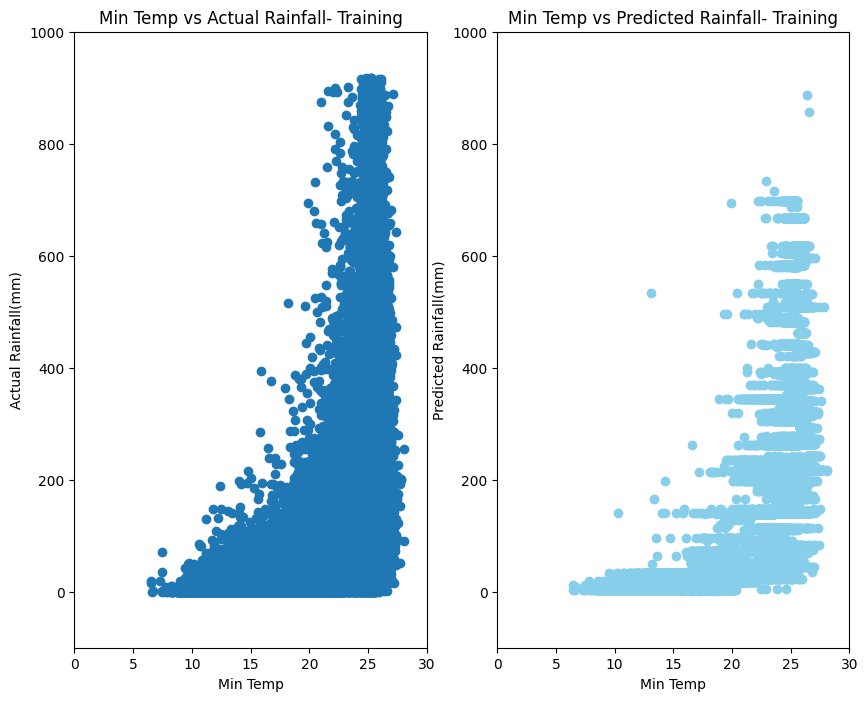

In [87]:
plot_figure(DT_result_train)

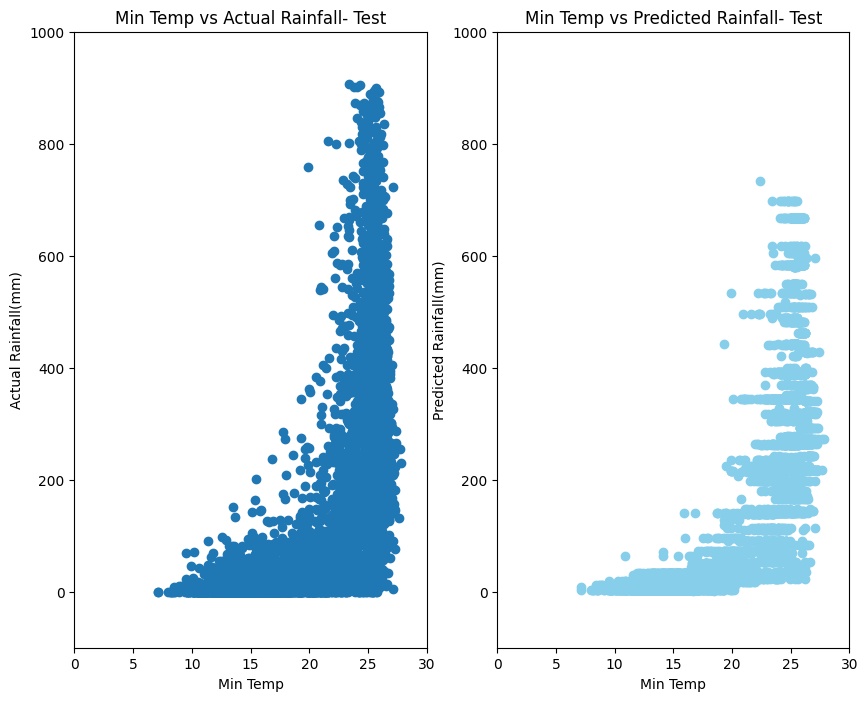

In [88]:
plot_figure(DT_result_test, train=False)

#  k-nearest neighbors Model

In [89]:
from sklearn.neighbors import KNeighborsRegressor

In [90]:
#Find the best value of hyper parameter
i = 1
k = 1
r = 0
while i<=100:
    Model_KNN = KNeighborsRegressor(i,weights='distance',algorithm='auto')
    Model_KNN.fit(x_train,y_train)
    y_prediction_test = Model_KNN.predict(x_test)
    r2 = r2_score(y_test, y_prediction_test)
    if r2> r:
        k=i
    i += i
print("Best Value of k is: " ,k)

Best Value of k is:  64


# k-nearest neighbors Model Accuracy Check

In [91]:
Model_KNN = KNeighborsRegressor(64,weights='distance',algorithm='auto')
Model_KNN.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=64, weights='distance')

In [92]:
Model_KNN_prediction_test = Model_KNN.predict(x_test)
Model_KNN_prediction_train = Model_KNN.predict(x_train)

In [93]:
Model_KNN_rmse_train = np.sqrt(mean_squared_error(y_train, Model_KNN_prediction_train))
Model_KNN_rmse_train

4.940788191215088

In [94]:
Model_KNN_rmse_test = np.sqrt(mean_squared_error(y_test, Model_KNN_prediction_test))
Model_KNN_rmse_test

103.30732393126027

In [95]:
Model_KNN_r2_train = r2_score(y_train, Model_KNN_prediction_train)
Model_KNN_r2_train

0.9994170177430406

In [96]:
Model_KNN_r2_test = r2_score(y_test, Model_KNN_prediction_test)
Model_KNN_r2_test

0.7511168398335577

In [97]:
KNN_result_train = data.iloc[training_index[0]]
KNN_result_train = KNN_result_train.reset_index(drop = True)
KNN_result_train['Predicted Rainfall(mm)'] = pd.DataFrame(Model_KNN_prediction_train)

KNN_result_test = data.iloc[testing_index[0]]
KNN_result_test = KNN_result_test.reset_index(drop = True)
KNN_result_test['Predicted Rainfall(mm)'] = pd.DataFrame(Model_KNN_prediction_test)

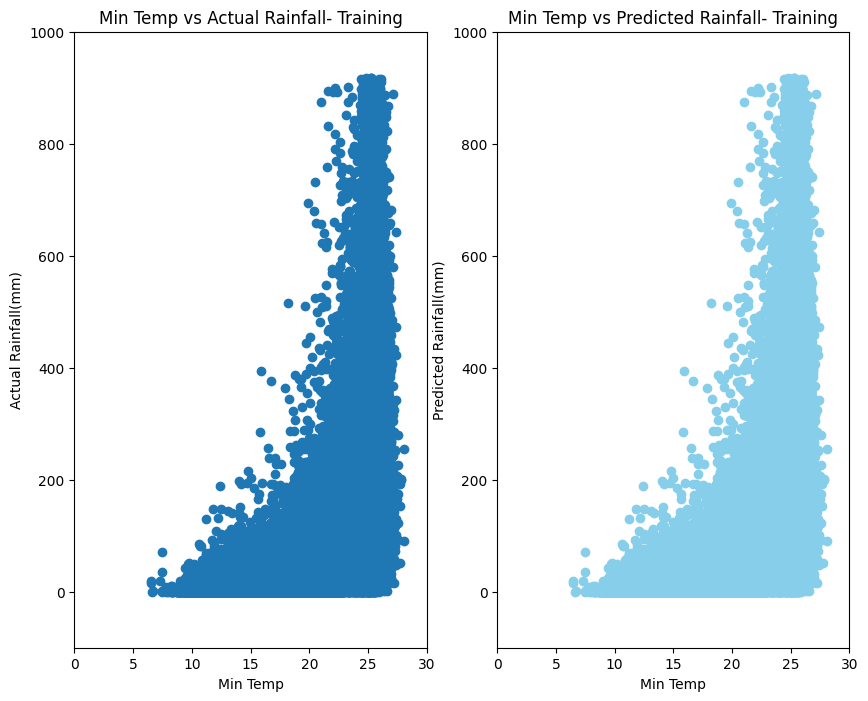

In [98]:
plot_figure(KNN_result_train)

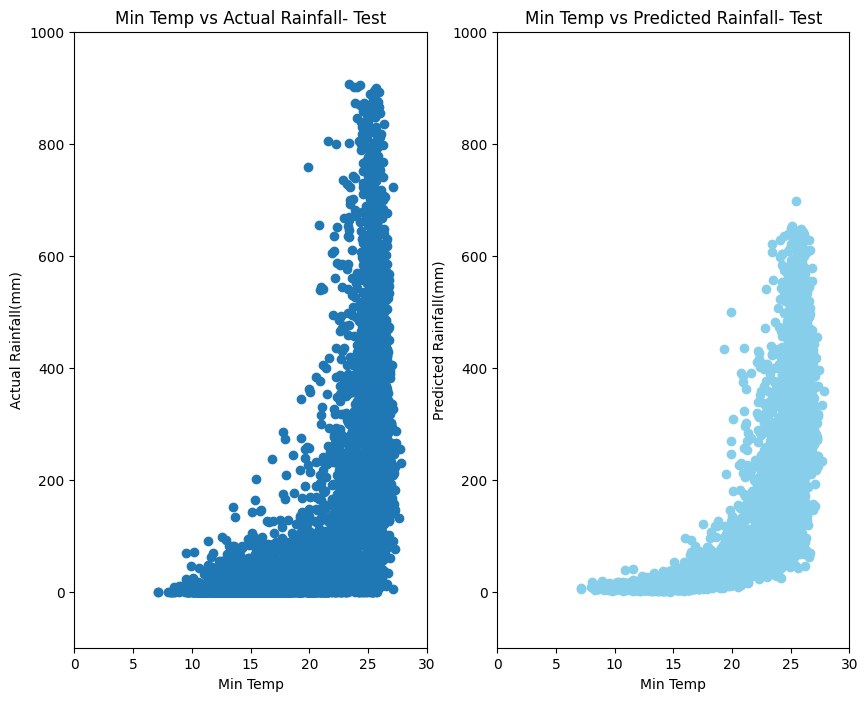

In [99]:
plot_figure(KNN_result_test, train=False)

# Support vector machine (SVM) Model

In [100]:
from sklearn.svm import SVR

In [101]:
x_train_SVM, x_test_SVM, y_train_SVM, y_test_SVM = x_train.values, x_test.values, y_train.values.ravel(), y_test.values.ravel()

In [102]:
Model_SVM = SVR(kernel='rbf')
Model_SVM.fit(x_train_SVM,y_train_SVM)

SVR()

In [103]:
Model_SVM_prediction_test = Model_SVM.predict(x_test_SVM)
Model_SVM_prediction_train = Model_SVM.predict(x_train_SVM)

# Support vector machine (SVM) Model Accuracy Check

In [104]:
Model_SVM_rmse_train = np.sqrt(mean_squared_error(y_train, Model_SVM_prediction_train))
Model_SVM_rmse_train

118.95657050392288

In [105]:
Model_SVM_rmse_test = np.sqrt(mean_squared_error(y_test, Model_SVM_prediction_test))
Model_SVM_rmse_test

118.81265079086405

In [106]:
Model_SVM_r2_train = r2_score(y_train, Model_SVM_prediction_train)
Model_SVM_r2_train

0.6620598949875462

In [107]:
Model_SVM_r2_test = r2_score(y_test, Model_SVM_prediction_test)
Model_SVM_r2_test

0.6708008843691419

In [108]:
SVM_result_train = data.iloc[training_index[0]]
SVM_result_train = SVM_result_train.reset_index(drop = True)
SVM_result_train['Predicted Rainfall(mm)'] = pd.DataFrame(Model_SVM_prediction_train)

SVM_result_test = data.iloc[testing_index[0]]
SVM_result_test = SVM_result_test.reset_index(drop = True)
SVM_result_test['Predicted Rainfall(mm)'] = pd.DataFrame(Model_SVM_prediction_test)

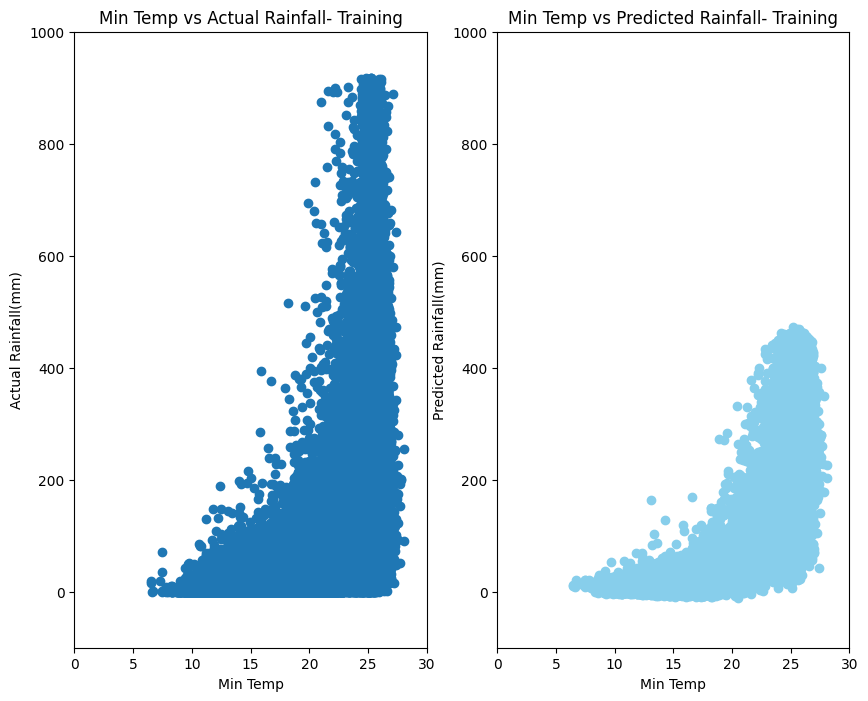

In [109]:
plot_figure(SVM_result_train)

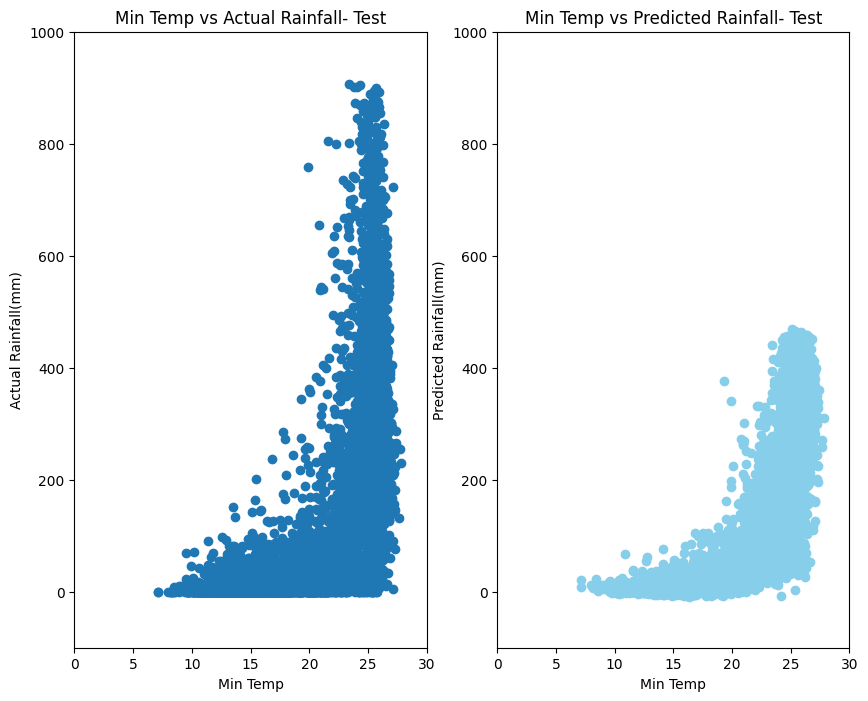

In [110]:
plot_figure(SVM_result_test, train=False)

# Random Forest Model

In [111]:
from sklearn.ensemble import RandomForestRegressor
x_train_RF, x_test_RF, y_train_RF, y_test_RF = x_train.values, x_test.values, y_train.values.ravel(), y_test.values.ravel()

In [112]:
# #find out best max depth for RF
# i =1
# cod = 0
# j =1

# while (i<=20):
#         regressor = RandomForestRegressor(n_estimators = 400,criterion='squared_error',random_state = 0,max_depth= 20,bootstrap =True)
#         regressor.fit(x_train_RF, y_train_RF)
#         y_pred_test = regressor.predict(x_test_RF)
#         r2 = r2_score(y_test_RF, y_pred_test)
#         if r2>cod :
#             j = i
#         i += 1
# print("\ best max depth is: ", j)

In [113]:
Model_RF = RandomForestRegressor(n_estimators = 350,criterion='squared_error',random_state = 0,max_depth= 20,bootstrap =True)
# fit the regressor with x and y data
Model_RF.fit(x_train_RF, y_train_RF)
  

RandomForestRegressor(max_depth=20, n_estimators=350, random_state=0)

In [114]:
Model_RF_prediction_test = Model_RF.predict(x_test_RF)
Model_RF_prediction_train = Model_RF.predict(x_train_RF)

# Random Forest Model Accuracy Check

In [115]:
Model_RF_rmse_train = np.sqrt(mean_squared_error(y_train, Model_RF_prediction_train))
Model_RF_rmse_train

38.08445652403463

In [116]:
Model_RF_rmse_test = np.sqrt(mean_squared_error(y_test, Model_RF_prediction_test))
Model_RF_rmse_test

97.00806172355145

In [117]:
Model_RF_r2_train = r2_score(y_train, Model_RF_prediction_train)
Model_RF_r2_train

0.9653615548242394

In [118]:
Model_RF_r2_test = r2_score(y_test, Model_RF_prediction_test)
Model_RF_r2_test

0.7805432499094287

In [119]:
RF_result_train = data.iloc[training_index[0]]
RF_result_train = RF_result_train.reset_index(drop = True)
RF_result_train['Predicted Rainfall(mm)'] = pd.DataFrame(Model_RF_prediction_train)

RF_result_test = data.iloc[testing_index[0]]
RF_result_test = RF_result_test.reset_index(drop = True)
RF_result_test['Predicted Rainfall(mm)'] = pd.DataFrame(Model_RF_prediction_test)

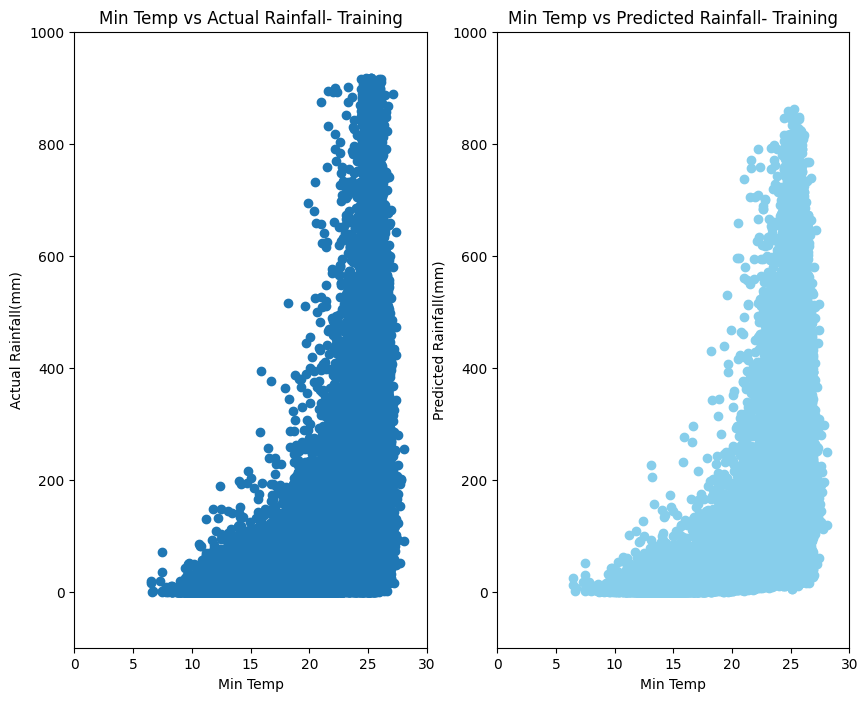

In [120]:
plot_figure(RF_result_train)

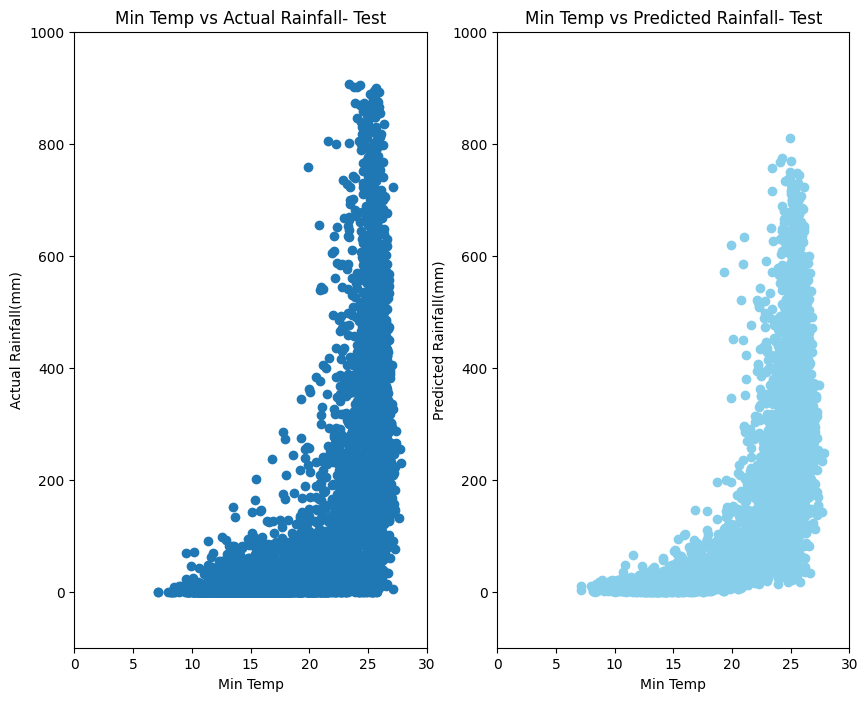

In [121]:
plot_figure(RF_result_test, train=False)

# AdaBoost Regressor Model

In [122]:
from sklearn.ensemble import AdaBoostRegressor
x_train_AB, x_test_AB, y_train_AB, y_test_AB = x_train.values, x_test.values, y_train.values.ravel(), y_test.values.ravel()

In [123]:
Model_AB = AdaBoostRegressor(random_state=0, n_estimators=12,loss ='linear',learning_rate =0.3)
Model_AB.fit(x_train_AB, y_train_AB)

AdaBoostRegressor(learning_rate=0.3, n_estimators=12, random_state=0)

In [124]:
Model_AB_prediction_test = Model_AB.predict(x_test_AB)
Model_AB_prediction_train = Model_AB.predict(x_train_AB)

# AdaBoost Regressor Model Accuracy Check

In [125]:
Model_AB_rmse_train = np.sqrt(mean_squared_error(y_train, Model_AB_prediction_train))
Model_AB_rmse_train

110.99406714036074

In [126]:
Model_AB_rmse_test = np.sqrt(mean_squared_error(y_test, Model_AB_prediction_test))
Model_AB_rmse_test

109.80950167041945

In [127]:
Model_AB_r2_train = r2_score(y_train, Model_AB_prediction_train)
Model_AB_r2_train

0.7057866361317431

In [128]:
Model_AB_r2_test = r2_score(y_test, Model_AB_prediction_test)
Model_AB_r2_test

0.7188014153794761

In [129]:
AB_result_train = data.iloc[training_index[0]]
AB_result_train = AB_result_train.reset_index(drop = True)
AB_result_train['Predicted Rainfall(mm)'] = pd.DataFrame(Model_AB_prediction_train)

AB_result_test = data.iloc[testing_index[0]]
AB_result_test = MLR_result_test.reset_index(drop = True)
AB_result_test['Predicted Rainfall(mm)'] = pd.DataFrame(Model_AB_prediction_test)

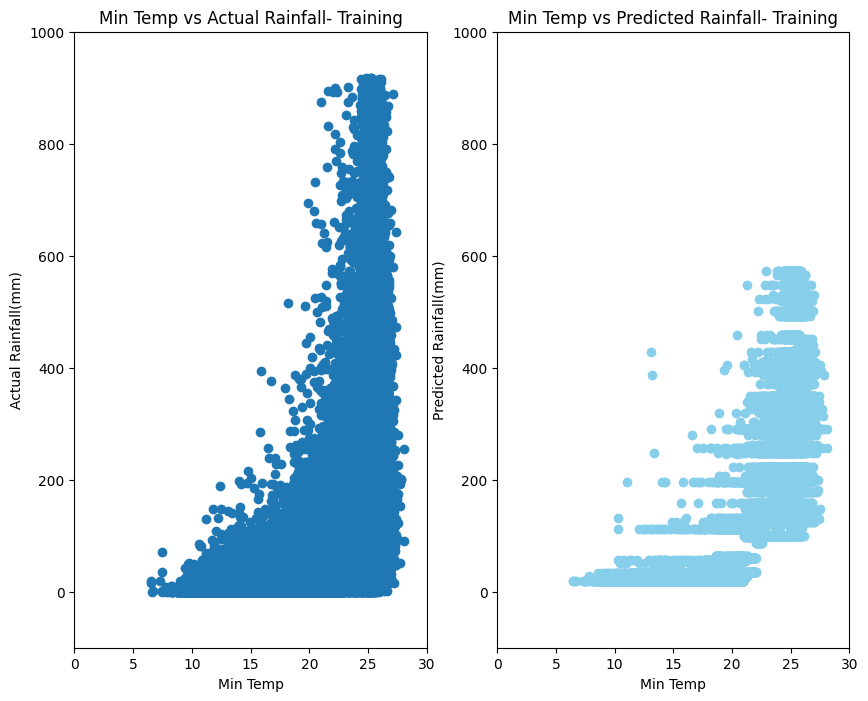

In [130]:
plot_figure(AB_result_train)

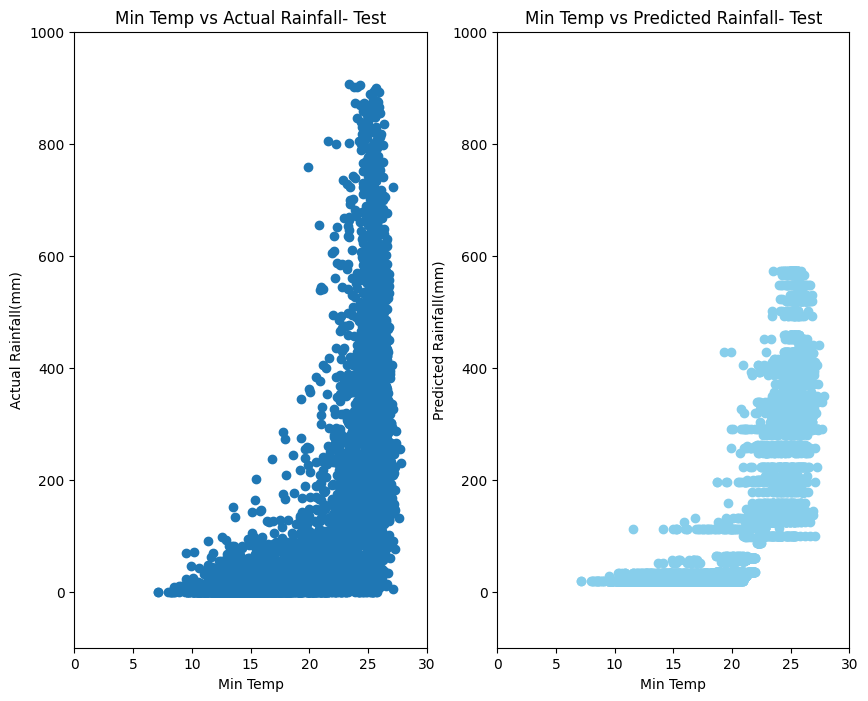

In [131]:
plot_figure(AB_result_test, train=False)

# Stacking Regressor Model

In [132]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
x_train_SR, x_test_SR, y_train_SR, y_test_SR = x_train_poly, x_test_poly, y_train.values.ravel(), y_test.values.ravel()

In [133]:
estimators = [('lr',LinearRegression()),('svr', SVR())]
Model_SR = StackingRegressor(estimators=estimators,final_estimator=RandomForestRegressor(n_estimators = 350,criterion='squared_error',random_state = 0,max_depth= 20,bootstrap =True))
Model_SR.fit(x_train_SR, y_train_SR)

StackingRegressor(estimators=[('lr', LinearRegression()), ('svr', SVR())],
                  final_estimator=RandomForestRegressor(max_depth=20,
                                                        n_estimators=350,
                                                        random_state=0))

In [134]:
Model_SR_prediction_test = Model_SR.predict(x_test_SR)
Model_SR_prediction_train = Model_SR.predict(x_train_SR)

# Stacking Regressor Model Accuracy Check

In [135]:
Model_SR_rmse_train = np.sqrt(mean_squared_error(y_train, Model_SR_prediction_train))
Model_SR_rmse_train

102.04214368811326

In [136]:
Model_SR_rmse_test = np.sqrt(mean_squared_error(y_test, Model_SR_prediction_test))
Model_SR_rmse_test

102.27020280961318

In [137]:
Model_SR_r2_train = r2_score(y_train, Model_SR_prediction_train)
Model_SR_r2_train

0.7513307916072273

In [138]:
Model_SR_r2_test = r2_score(y_test, Model_SR_prediction_test)
Model_SR_r2_test

0.7560889232359791

In [139]:
SR_result_train = data.iloc[training_index[0]]
SR_result_train = SR_result_train.reset_index(drop = True)
SR_result_train['Predicted Rainfall(mm)'] = pd.DataFrame(Model_SR_prediction_train)

SR_result_test = data.iloc[testing_index[0]]
SR_result_test = SR_result_test.reset_index(drop = True)
SR_result_test['Predicted Rainfall(mm)'] = pd.DataFrame(Model_SR_prediction_test)

In [ ]:
plot_figure(SR_result_train)

In [ ]:
plot_figure(SR_result_test, train=False)

# Artificial Neural Network Model

In [ ]:
from sklearn.neural_network import MLPRegressor
x_train_ANN, x_test_ANN, y_train_ANN, y_test_ANN = x_train.values, x_test.values, y_train.values.ravel(), y_test.values.ravel()

In [143]:
Model_ANN = MLPRegressor(random_state=1, max_iter=10000)
Model_ANN.fit(x_train_ANN, y_train_ANN)

MLPRegressor(max_iter=10000, random_state=1)

In [144]:
Model_ANN_prediction_test = Model_ANN.predict(x_test_ANN)
Model_ANN_prediction_train = Model_ANN.predict(x_train_ANN)

# Artificial Neural Network Model Accuracy Check

In [145]:
Model_ANN_rmse_train = np.sqrt(mean_squared_error(y_train, Model_ANN_prediction_train))
Model_ANN_rmse_train

99.00137775825822

In [146]:
Model_ANN_rmse_test = np.sqrt(mean_squared_error(y_test, Model_ANN_prediction_test))
Model_ANN_rmse_test

97.4469077333012

In [147]:
Model_ANN_r2_train = r2_score(y_train, Model_ANN_prediction_train)
Model_ANN_r2_train

0.7659302228750521

In [148]:
Model_ANN_r2_test = r2_score(y_test, Model_ANN_prediction_test)
Model_ANN_r2_test

0.778553197613333

In [149]:
ANN_result_train = data.iloc[training_index[0]]
ANN_result_train = ANN_result_train.reset_index(drop = True)
ANN_result_train['Predicted Rainfall(mm)'] = pd.DataFrame(Model_ANN_prediction_train)

ANN_result_test = data.iloc[testing_index[0]]
ANN_result_test = ANN_result_test.reset_index(drop = True)
ANN_result_test['Predicted Rainfall(mm)'] = pd.DataFrame(Model_ANN_prediction_test)

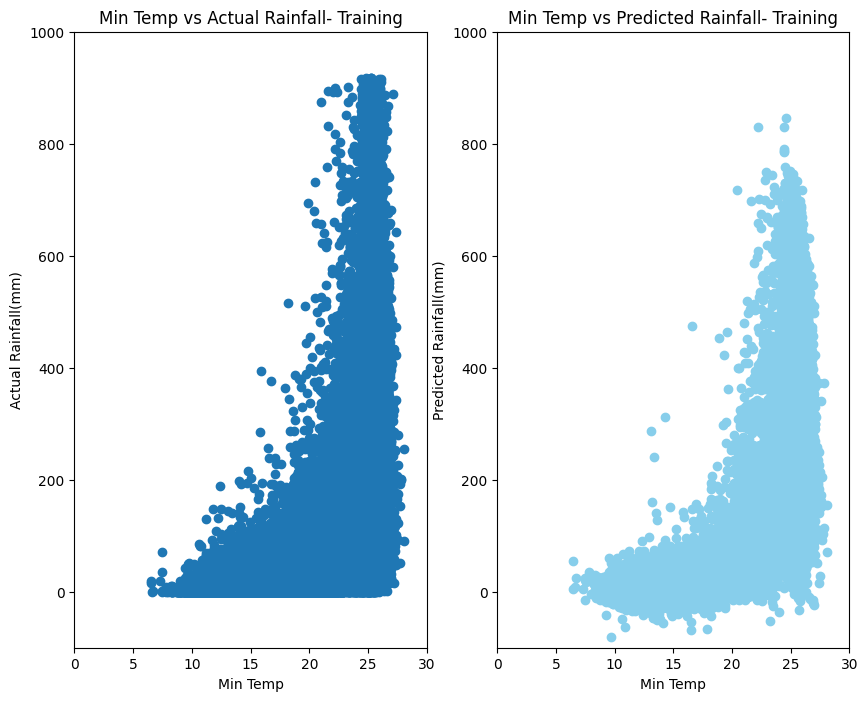

In [150]:
plot_figure(ANN_result_train)

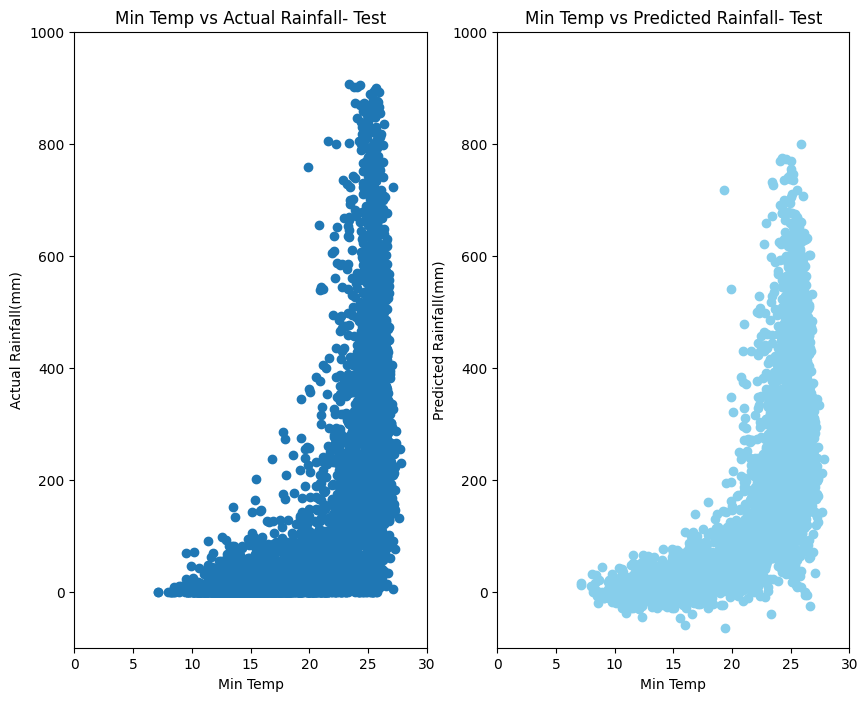

In [151]:
plot_figure(ANN_result_test, train=False)

# GRU + Attention + XGBoost

In [152]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GRU, Dense, Attention, Concatenate
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import xgboost as xgb


# Prepare your data (assuming 'data_scaled' is already preprocessed)
x_np = x.to_numpy() # Features
y_np = y.to_numpy() # Target

# Reshape x to 3D (samples, timesteps, features) for the GRU Encoder
x_np = np.reshape(x_np, (x_np.shape[0], 1, x_np.shape[1]))

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x_np, y_np, test_size=0.2, random_state=42)

# GRU Encoder-Decoder with Attention
# Encoder
encoder_inputs = Input(shape=(x_train.shape[1], x_train.shape[2]), name="Encoder_Input")
encoder_gru = GRU(64, return_sequences=True, return_state=True, name="Encoder_GRU")
encoder_outputs, encoder_state = encoder_gru(encoder_inputs)

# Decoder
decoder_inputs = Input(shape=(1, 1), name="Decoder_Input")  # Single timestep for teacher forcing
decoder_gru = GRU(64, return_sequences=True, return_state=True, name="Decoder_GRU")
decoder_outputs, decoder_state = decoder_gru(decoder_inputs, initial_state=encoder_state)

# Attention Mechanism
attention_layer = Attention(name="Attention_Layer")
attention_output = attention_layer([decoder_outputs, encoder_outputs])

# Concatenate Attention Output with Decoder Output
decoder_combined_context = Concatenate(axis=-1, name="Context_Concatenation")([decoder_outputs, attention_output])

# Final Dense Layer for Regression Output
decoder_dense = Dense(1, activation="linear", name="Output_Layer")
decoder_final_output = decoder_dense(decoder_combined_context)

# Define Model
gru_attention_model = Model(inputs=[encoder_inputs, decoder_inputs], outputs=decoder_final_output, name="GRU_Attention_Model")
gru_attention_model.compile(optimizer=Adam(learning_rate=0.001), loss="mse")

# Print Model Summary
gru_attention_model.summary()

# Prepare Decoder Input for Teacher Forcing (Initial input is 0 for all samples)
decoder_input_train = np.zeros((x_train.shape[0], 1, 1))
decoder_input_test = np.zeros((x_test.shape[0], 1, 1))

# Train the Model
gru_attention_model.fit([x_train, decoder_input_train], y_train, epochs=100, batch_size=32, validation_split=0.2)

# Predictions
train_predictions = gru_attention_model.predict([x_train, decoder_input_train]).flatten()
test_predictions = gru_attention_model.predict([x_test, decoder_input_test]).flatten()

# Calculate R² and RMSE for the train and test datasets
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))  # RMSE for training data
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))      # RMSE for test data

train_r2 = r2_score(y_train, train_predictions)  # R² for training data
test_r2 = r2_score(y_test, test_predictions)    # R² for test data

# Ensure train_predictions and test_predictions have the same dimensions as x_train and x_test
train_predictions = np.expand_dims(train_predictions, axis=-1)  # Convert to 2D (n_samples, 1)
test_predictions = np.expand_dims(test_predictions, axis=-1)    # Convert to 2D (n_samples, 1)


# Create the XGBoost model
xgb_model = xgb.XGBRegressor(
    subsample=0.8,
    reg_lambda=10,
    reg_alpha=0,
    n_estimators=300,
    min_child_weight=5,
    max_depth=5,
    learning_rate=0.05,
    gamma=0.3,
    colsample_bytree=1.0,
    random_state=0
)

# Train the model using GRU predictions as additional features
x_train_xgb = np.concatenate((x_train.reshape(x_train.shape[0], -1), train_predictions), axis=1)
x_test_xgb = np.concatenate((x_test.reshape(x_test.shape[0], -1), test_predictions), axis=1)

xgb_model.fit(x_train_xgb, y_train)

# Make predictions
xgb_train_pred = xgb_model.predict(x_train_xgb)
xgb_test_pred = xgb_model.predict(x_test_xgb)

Model: "GRU_Attention_Model"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Encoder_Input       │ (None, 1, 8)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Decoder_Input       │ (None, 1, 1)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Encoder_GRU (GRU)   │ [(None, 1, 64),   │     14,208 │ Encoder_Input[0]… │
│                     │ (None, 64)]       │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Decoder_GRU (GRU)   │ [(None, 1, 64),   │     12,864 │ Decoder_Input[0]… │
│                     │ (None, 64)]       │            │ Encoder_GRU[0][1] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Attention_Layer     │ (None, 1, 64)     │          0 │ Decoder_GRU[0][0… │
│ (Attention)         │                   │            │ Encoder_GRU[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Context_Concatenat… │ (None, 1, 128)    │          0 │ Decoder_GRU[0][0… │
│ (Concatenate)       │                   │            │ Attention_Layer[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Output_Layer        │ (None, 1, 1)      │        129 │ Context_Concaten… │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 27,201 (106.25 KB)

 Trainable params: 27,201 (106.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


474/474 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 69794.2500 - val_loss: 53806.5586
Epoch 2/100
474/474 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 52678.3047 - val_loss: 43804.5898
Epoch 3/100
474/474 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 44703.2500 - val_loss: 41280.9609
Epoch 4/100
474/474 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 41476.5625 - val_loss: 40919.1602
Epoch 5/100
474/474 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 42848.8516 - val_loss: 40886.6875
Epoch 6/100
474/474 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 41847.6875 - val_loss: 40885.6953
Epoch 7/100
474/474 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 41624.9219 - val_loss: 40888.2109
Epoch 8/100
474/474 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 42417.0469 - val_loss: 40884.3203
Epoch 9/100
474/474 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 41777.3789 - val_loss: 40886.4727
Epoch 10/100
474/474 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 41744.4648 - val_loss: 40886.3789
Epoch 11/100
474/474 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss:

/opt/conda/lib/python3.10/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


592/592 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


# GRU + Attention + XGBoost Accuracy Check

In [153]:
Model_GRU_rmse_train = np.sqrt(mean_squared_error(y_train, xgb_train_pred))
Model_GRU_rmse_train

84.06671676076381

In [154]:
Model_GRU_rmse_test = np.sqrt(mean_squared_error(y_test, xgb_test_pred))
Model_GRU_rmse_test

93.91303434338879

In [155]:
Model_GRU_r2_train = r2_score(y_train, xgb_train_pred)
Model_GRU_r2_train

0.8312238650280355

In [156]:
Model_GRU_r2_test = r2_score(y_test, xgb_test_pred)
Model_GRU_r2_test

0.794323328783236

In [157]:
GRU_result_train = data.iloc[training_index[0]]
GRU_result_train = GRU_result_train.reset_index(drop = True)
GRU_result_train['Predicted Rainfall(mm)'] = pd.DataFrame(xgb_train_pred)

GRU_result_test = data.iloc[testing_index[0]]
GRU_result_test = GRU_result_test.reset_index(drop = True)
GRU_result_test['Predicted Rainfall(mm)'] = pd.DataFrame(xgb_test_pred)

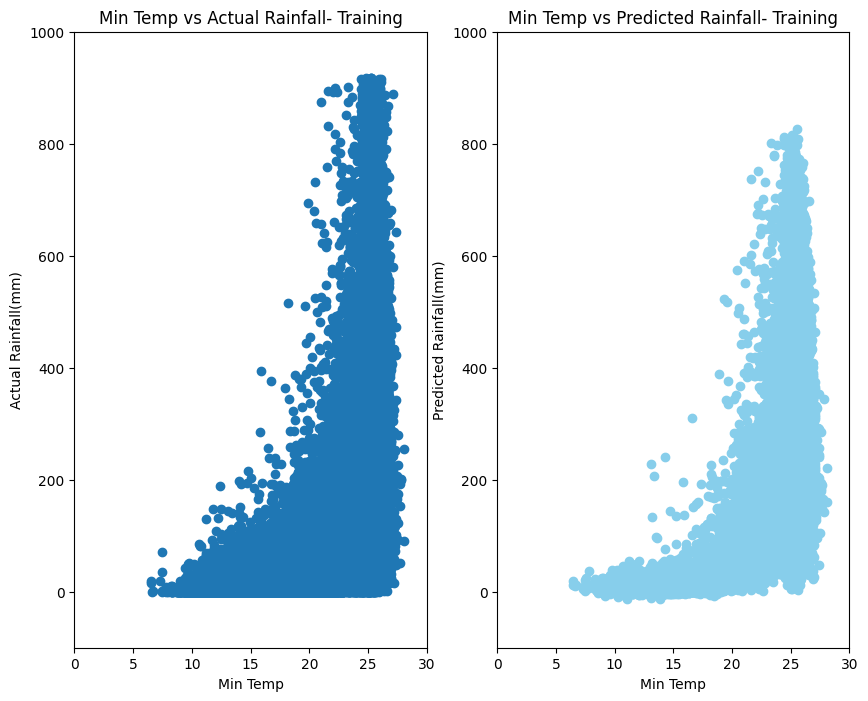

In [158]:
plot_figure(GRU_result_train)

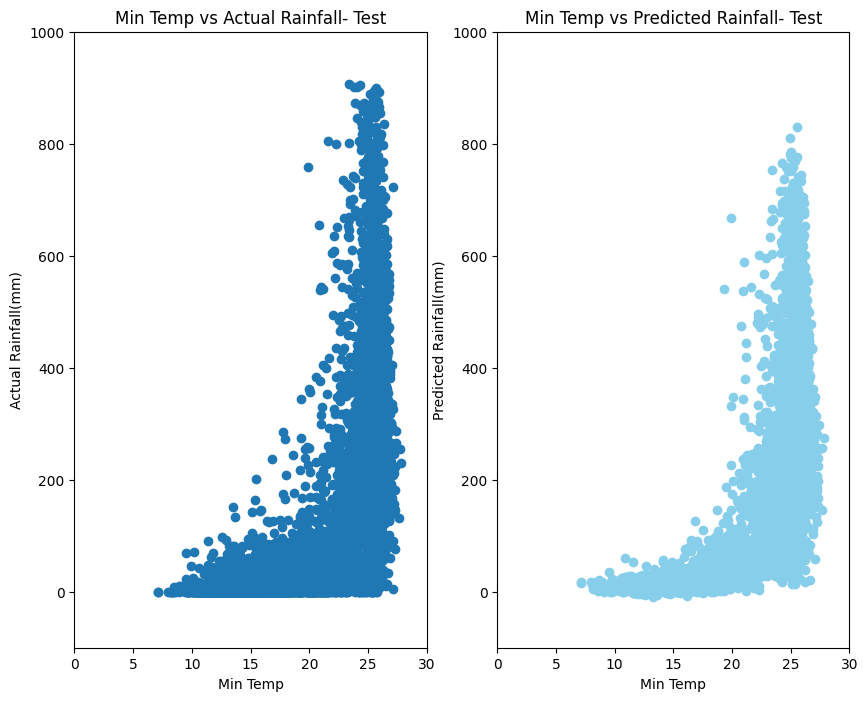

In [159]:
plot_figure(GRU_result_test, train = False)

# LSTM + Attention + XGBOOST

In [160]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Attention, Add
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import xgboost as xgb

# Prepare your data (assuming 'x' and 'y' are already preprocessed)
x_np = x.to_numpy()  # Features
y_np = y.to_numpy()  # Target

# Reshape x to 3D (samples, timesteps, features) for the LSTM
x_np = np.reshape(x_np, (x_np.shape[0], 1, x_np.shape[1]))

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x_np, y_np, test_size=0.2, random_state=42)

# Define the LSTM model with Attention mechanism and multiple LSTM layers
inputs = Input(shape=(x_train.shape[1], x_train.shape[2]))  # Input layer for LSTM

# First LSTM layer with return_sequences=True to pass the sequence to the next LSTM layer
lstm_1 = LSTM(64, return_sequences=True)(inputs)

# Second LSTM layer with return_sequences=True for the Attention layer
lstm_2 = LSTM(64, return_sequences=True)(lstm_1)

# Attention Layer: Applies attention to the second LSTM output
attention = Attention()([lstm_2, lstm_2])  # Self-attention mechanism
context = Add()([lstm_2, attention])  # Combine attention output with LSTM output

# Third LSTM layer (optional, with return_sequences=False for the final output)
lstm_3 = LSTM(32, return_sequences=False)(context)  # Final LSTM layer

# Output layer for regression task
output = Dense(1)(lstm_3)

# Create the model
model = Model(inputs=inputs, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Custom training procedure with best model saving
def custom_training_procedure(model, x_train, y_train, x_val, y_val, epochs=50, batch_size=32):
    best_loss = float('inf')
    best_weights = None

    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}/{epochs}")

        # Train the model
        history = model.fit(x_train, y_train, batch_size=batch_size, verbose=1, validation_data=(x_val, y_val))

        # Check validation loss
        val_loss = history.history['val_loss'][-1]
        print(f"Validation Loss: {val_loss}")

        # Save the weights if validation loss improves
        if val_loss < best_loss:
            best_loss = val_loss
            best_weights = model.get_weights()
            print("Updated best weights.")

    # Load the best weights
    if best_weights is not None:
        model.set_weights(best_weights)

    return model

# Train the model with the custom training procedure
model = custom_training_procedure(model, x_train, y_train, x_test, y_test, epochs=150, batch_size=32)

# Predictions
train_predictions = model.predict(x_train).flatten()
test_predictions = model.predict(x_test).flatten()

# Ensure train_predictions and test_predictions have the same dimensions as x_train and x_test
train_predictions = np.expand_dims(train_predictions, axis=-1)  # Convert to 2D (n_samples, 1)
test_predictions = np.expand_dims(test_predictions, axis=-1)    # Convert to 2D (n_samples, 1)

# Create the XGBoost model
xgb_model = xgb.XGBRegressor(
    subsample=0.8,
    reg_lambda=10,
    reg_alpha=0,
    n_estimators=300,
    min_child_weight=5,
    max_depth=5,
    learning_rate=0.05,
    gamma=0.3,
    colsample_bytree=1.0,
    random_state=0
)

# Train the XGBoost model using LSTM predictions as additional features
x_train_xgb = np.concatenate((x_train.reshape(x_train.shape[0], -1), train_predictions), axis=1)
x_test_xgb = np.concatenate((x_test.reshape(x_test.shape[0], -1), test_predictions), axis=1)

xgb_model.fit(x_train_xgb, y_train)

# Make predictions with the XGBoost model
xgb_train_pred = xgb_model.predict(x_train_xgb)
xgb_test_pred = xgb_model.predict(x_test_xgb)

# Evaluation metrics for the XGBoost model
train_r2 = r2_score(y_train, xgb_train_pred)
test_r2 = r2_score(y_test, xgb_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, xgb_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, xgb_test_pred))

# Print evaluation metrics
print("XGBoost Model Evaluation:")
print(f"Train R² Score: {train_r2}")
print(f"Test R² Score: {test_r2}")
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")



Epoch 1/150


/opt/conda/lib/python3.10/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


592/592 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 73431.1641 - val_loss: 68214.4375
Validation Loss: 68214.4375
Updated best weights.
Epoch 2/150
592/592 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 64384.3672 - val_loss: 63583.8320
Validation Loss: 63583.83203125
Updated best weights.
Epoch 3/150
592/592 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 62017.6094 - val_loss: 59418.6875
Validation Loss: 59418.6875
Updated best weights.
Epoch 4/150
592/592 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 57846.7656 - val_loss: 55599.8789
Validation Loss: 55599.87890625
Updated best weights.
Epoch 5/150
592/592 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 54288.3281 - val_loss: 52041.8398
Validation Loss: 52041.83984375
Updated best weights.
Epoch 6/150
592/592 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 50140.7617 - val_loss: 48714.7227
Validation Loss: 48714.72265625
Updated best weights.
Epoch 7/150
592/592 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 47366.4453 - val_loss: 45608.4102
Validation Loss: 45608.41015625

# LSTM + Attention + XGBoost Accuracy Check

In [161]:
Model_LSTM_rmse_train = np.sqrt(mean_squared_error(y_train, xgb_train_pred))
Model_LSTM_rmse_train

79.85674334491573

In [162]:
Model_LSTM_rmse_test = np.sqrt(mean_squared_error(y_test, xgb_test_pred))
Model_LSTM_rmse_test

94.65889845844546

In [163]:
Model_LSTM_r2_train = r2_score(y_train, xgb_train_pred)
Model_LSTM_r2_train

0.8477048563471656

In [164]:
Model_LSTM_r2_test = r2_score(y_test, xgb_test_pred)
Model_LSTM_r2_test

0.7910433574014686

In [165]:
LSTM_result_train = data.iloc[training_index[0]]
LSTM_result_train = LSTM_result_train.reset_index(drop = True)
LSTM_result_train['Predicted Rainfall(mm)'] = pd.DataFrame(xgb_train_pred)

LSTM_result_test = data.iloc[testing_index[0]]
LSTM_result_test = LSTM_result_test.reset_index(drop = True)
LSTM_result_test['Predicted Rainfall(mm)'] = pd.DataFrame(xgb_test_pred)

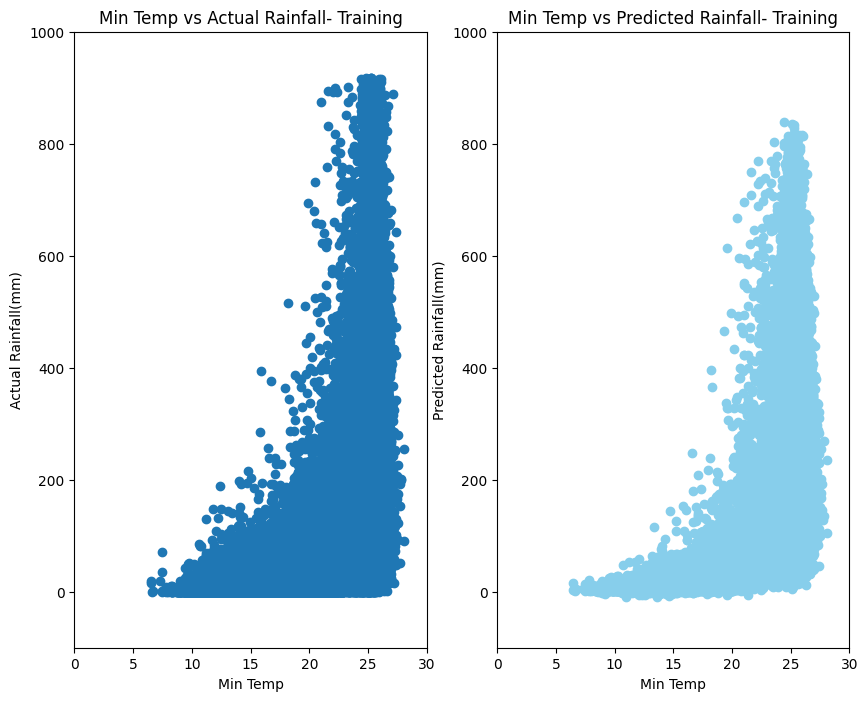

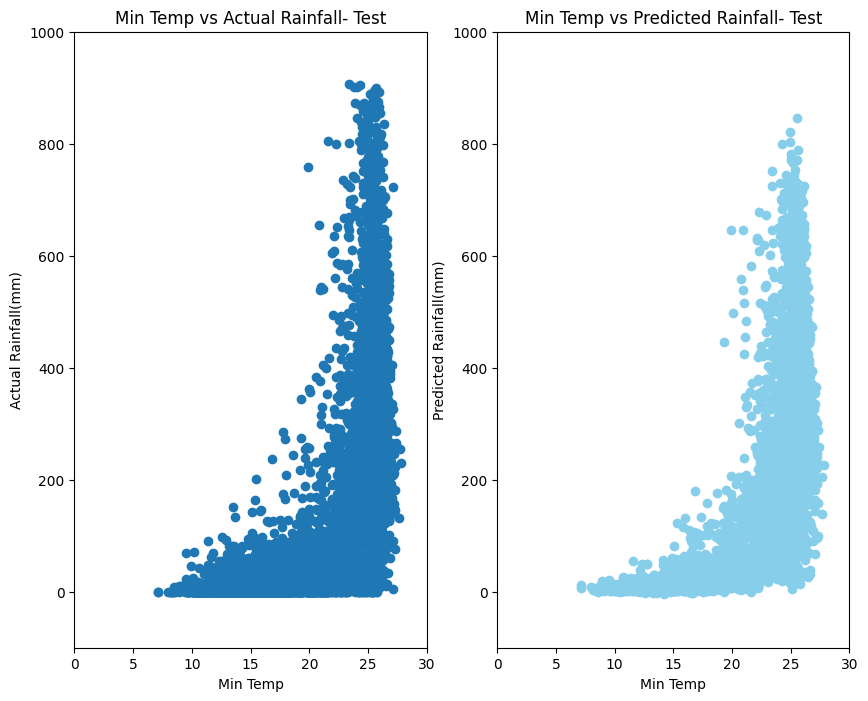

In [166]:
plot_figure(LSTM_result_train)
plot_figure(LSTM_result_test, train = False)

# Project Summary

In [167]:
ML_Models = ["Multiple Linear regression","Polynomial regression","Decision Tree model","k-nearest neighbors","Support vector machine (SVM)","Random Forest model","AdaBoost Regressor","Stacking Regressor","Artificial Neural Network", "GRU with Attention and XGBoost","LSTM with Attention and XGBoost" ]
r2 = [Model_MLR_r2_test,Model_PLR_r2_test,Model_DT_r2_test,Model_KNN_r2_test,Model_SVM_r2_test,Model_RF_r2_test,Model_AB_r2_test,Model_SR_r2_test,Model_ANN_r2_test, Model_GRU_r2_test,Model_LSTM_r2_test] 
rmse = [Model_MLR_rmse_test,Model_PLR_rmse_test,Model_DT_rmse_test,Model_KNN_rmse_test,Model_SVM_rmse_test,Model_RF_rmse_test,Model_AB_rmse_test,Model_SR_rmse_test,Model_ANN_rmse_test, Model_GRU_rmse_test, Model_LSTM_rmse_test]

In [168]:
result = pd.DataFrame(list(zip(ML_Models,r2,rmse)),columns =['ML Model','R2 Score','RMSE Score'])
print("Summery of the project is as follows: \n")
result

Summery of the project is as follows: 



,ML Model,R2 Score,RMSE Score
0,Multiple Linear regression,0.676096,117.853209
1,Polynomial regression,0.779087,97.329476
2,Decision Tree model,0.737548,106.085994
3,k-nearest neighbors,0.751117,103.307324
4,Support vector machine (SVM),0.670801,118.812651
5,Random Forest model,0.780543,97.008062
6,AdaBoost Regressor,0.718801,109.809502
7,Stacking Regressor,0.756089,102.270203
8,Artificial Neural Network,0.778553,97.446908
9,GRU with Attention and XGBoost,0.794323,93.913034


<function matplotlib.pyplot.show(close=None, block=None)>

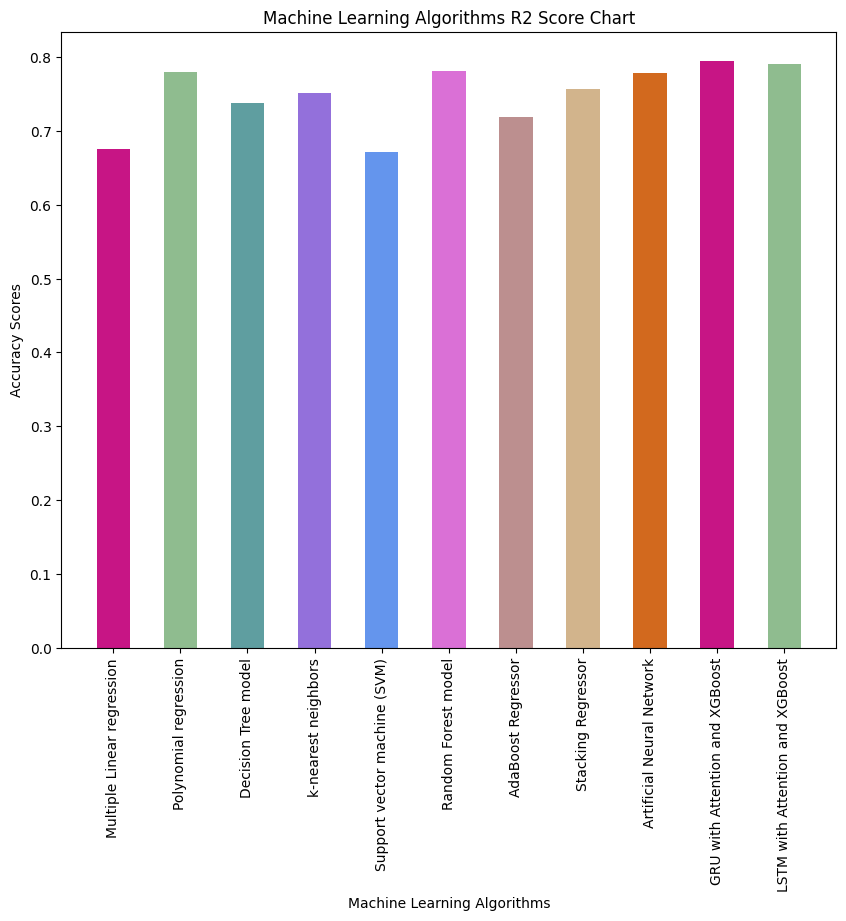

In [169]:
c = ['mediumvioletred','darkseagreen','cadetblue','mediumpurple','cornflowerblue','orchid','rosybrown','tan','chocolate']
plt.figure(figsize=(10, 8))
plt.bar(ML_Models, r2, width=0.5,color=c)

plt.xlabel('Machine Learning Algorithms')

plt.ylabel('Accuracy Scores')

plt.title('Machine Learning Algorithms R2 Score Chart')

plt.xticks(rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

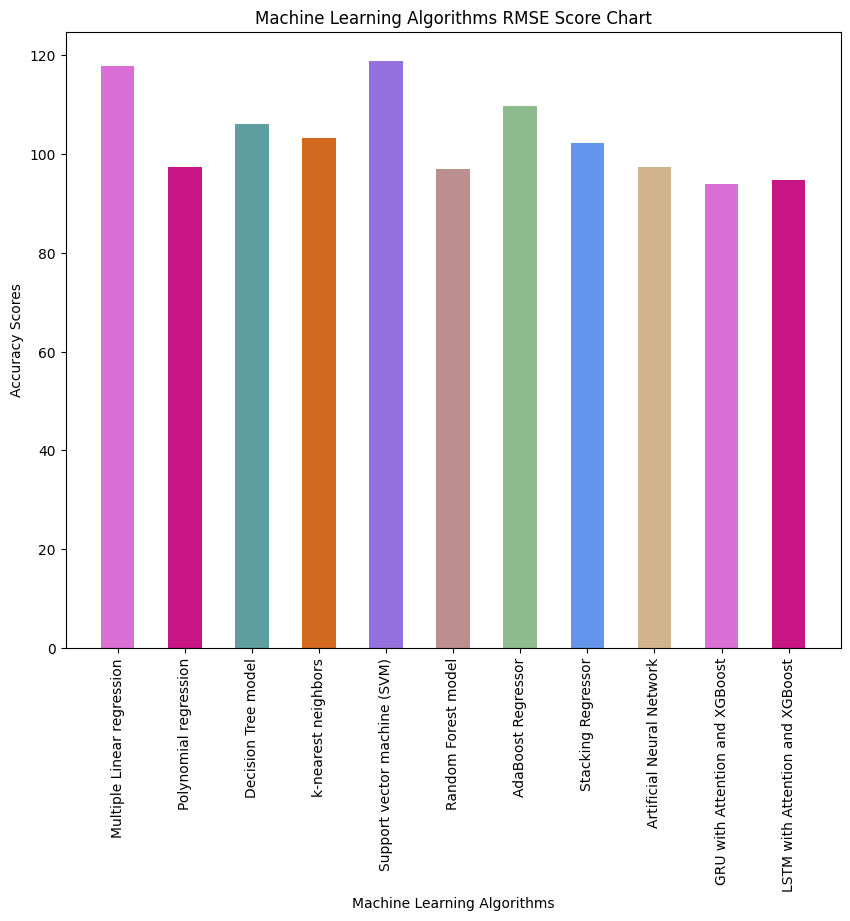

In [170]:
c = ['orchid','mediumvioletred','cadetblue','chocolate','mediumpurple','rosybrown','darkseagreen','cornflowerblue','tan']
plt.figure(figsize=(10, 8))
plt.bar(ML_Models, rmse, width=0.5,color=c)

plt.xlabel('Machine Learning Algorithms')

plt.ylabel('Accuracy Scores')

plt.title('Machine Learning Algorithms RMSE Score Chart')

plt.xticks(rotation=90)
plt.show

# Benchmarking


### GRU Encoder Decoder with Attention (Paper Code) with our dataset

In [171]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# early stopping
early_stopping = EarlyStopping(
    monitor="val_loss",  # Monitor the validation loss
    patience=10,         # Number of epochs to wait after no improvement
    restore_best_weights=True,  # Restore model weights from the epoch with the best validation loss
    verbose=1            # Print updates about stopping
)

# Prepare your data (assuming 'data_scaled' is already preprocessed)
x_np = x.to_numpy() # Features
y_np = y.to_numpy() # Target

# Reshape x to 3D (samples, timesteps, features) for the GRU Encoder
x_np = np.reshape(x_np, (x_np.shape[0], 1, x_np.shape[1]))

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x_np, y_np, test_size=0.2, random_state=42)

# GRU Encoder-Decoder with Attention
# Encoder
encoder_inputs = Input(shape=(x_train.shape[1], x_train.shape[2]), name="Encoder_Input")
encoder_gru = GRU(64, return_sequences=True, return_state=True, name="Encoder_GRU")
encoder_outputs, encoder_state = encoder_gru(encoder_inputs)

# Decoder
decoder_inputs = Input(shape=(1, 1), name="Decoder_Input")  # Single timestep for teacher forcing
decoder_gru = GRU(64, return_sequences=True, return_state=True, name="Decoder_GRU")
decoder_outputs, decoder_state = decoder_gru(decoder_inputs, initial_state=encoder_state)

# Attention Mechanism
attention_layer = Attention(name="Attention_Layer")
attention_output = attention_layer([decoder_outputs, encoder_outputs])

# Concatenate Attention Output with Decoder Output
decoder_combined_context = Concatenate(axis=-1, name="Context_Concatenation")([decoder_outputs, attention_output])

# Final Dense Layer for Regression Output
decoder_dense = Dense(1, activation="linear", name="Output_Layer")
decoder_final_output = decoder_dense(decoder_combined_context)

# Define Model
gru_attention_model = Model(inputs=[encoder_inputs, decoder_inputs], outputs=decoder_final_output, name="GRU_Attention_Model")
gru_attention_model.compile(optimizer=Adam(learning_rate=0.001), loss="mse")

# Print Model Summary
gru_attention_model.summary()

# Prepare Decoder Input for Teacher Forcing (Initial input is 0 for all samples)
decoder_input_train = np.zeros((x_train.shape[0], 1, 1))
decoder_input_test = np.zeros((x_test.shape[0], 1, 1))

# Train the Model
gru_attention_model.fit([x_train, decoder_input_train], y_train, epochs=100, batch_size=32, validation_split=0.2,callbacks=[early_stopping])

# Predictions
train_predictions = gru_attention_model.predict([x_train, decoder_input_train]).flatten()
test_predictions = gru_attention_model.predict([x_test, decoder_input_test]).flatten()

# Combine GRU predictions with original features
train_predictions = train_predictions.reshape(-1, 1)  # Reshape to 2D (samples, 1)
test_predictions = test_predictions.reshape(-1, 1)    # Reshape to 2D (samples, 1)

x_train_combined = np.concatenate((x_train.reshape(x_train.shape[0], -1), train_predictions), axis=1)
x_test_combined = np.concatenate((x_test.reshape(x_test.shape[0], -1), test_predictions), axis=1)

# Reshape the combined data for DCNN (samples, timesteps, features)
x_train_combined = x_train_combined.reshape(x_train_combined.shape[0], 1, x_train_combined.shape[1])
x_test_combined = x_test_combined.reshape(x_test_combined.shape[0], 1, x_test_combined.shape[1])

# Build the DCNN model
dcnn_model = Sequential([
    Input(shape=(x_train_combined.shape[1], x_train_combined.shape[2])),  # Input shape (timesteps, features)
    Conv1D(filters=64, kernel_size=3, dilation_rate=1, activation='relu', padding='causal'),
    Conv1D(filters=64, kernel_size=3, dilation_rate=2, activation='relu', padding='causal'),
    Conv1D(filters=64, kernel_size=3, dilation_rate=4, activation='relu', padding='causal'),
    Flatten(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')  # Output layer for regression
])

# Compile the model
dcnn_model.compile(optimizer=Adam(learning_rate=0.001), loss="mse")

# Print model summary
dcnn_model.summary()

# Train the DCNN model
dcnn_model.fit(x_train_combined, y_train, epochs=50, batch_size=32, validation_split=0.2,callbacks=[early_stopping])

# Make predictions
dcnn_train_pred = dcnn_model.predict(x_train_combined).flatten()
dcnn_test_pred = dcnn_model.predict(x_test_combined).flatten()


Model: "GRU_Attention_Model"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Encoder_Input       │ (None, 1, 8)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Decoder_Input       │ (None, 1, 1)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Encoder_GRU (GRU)   │ [(None, 1, 64),   │     14,208 │ Encoder_Input[0]… │
│                     │ (None, 64)]       │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Decoder_GRU (GRU)   │ [(None, 1, 64),   │     12,864 │ Decoder_Input[0]… │
│                     │ (None, 64)]       │            │ Encoder_GRU[0][1] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Attention_Layer     │ (None, 1, 64)     │          0 │ Decoder_GRU[0][0… │
│ (Attention)         │                   │            │ Encoder_GRU[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Context_Concatenat… │ (None, 1, 128)    │          0 │ Decoder_GRU[0][0… │
│ (Concatenate)       │                   │            │ Attention_Layer[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Output_Layer        │ (None, 1, 1)      │        129 │ Context_Concaten… │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 27,201 (106.25 KB)

 Trainable params: 27,201 (106.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


474/474 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 70482.0547 - val_loss: 53730.0781
Epoch 2/100
474/474 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 49994.5156 - val_loss: 43639.7109
Epoch 3/100
474/474 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 43520.7773 - val_loss: 41245.6562
Epoch 4/100
474/474 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 42503.0117 - val_loss: 40913.5859
Epoch 5/100
474/474 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 41898.8945 - val_loss: 40886.9727
Epoch 6/100
474/474 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 42509.0781 - val_loss: 40888.5078
Epoch 7/100
474/474 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 42590.0234 - val_loss: 40884.3125
Epoch 8/100
474/474 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 41662.4180 - val_loss: 40885.4375
Epoch 9/100
474/474 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 42262.3594 - val_loss: 40891.2422
Epoch 10/100
474/474 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 42158.9688 - val_loss: 40889.3164
Epoch 11/100
474/474 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss:

/opt/conda/lib/python3.10/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)               │ (None, 1, 64)          │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 1, 64)          │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 1, 64)          │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,721 (120.00 KB)

 Trainable params: 30,721 (120.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
474/474 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 43639.5234 - val_loss: 15501.7764
Epoch 2/50
474/474 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 15776.7275 - val_loss: 14248.5654
Epoch 3/50
474/474 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 14400.6006 - val_loss: 12811.7822
Epoch 4/50
474/474 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 14798.7021 - val_loss: 12619.0361
Epoch 5/50
474/474 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 14124.9795 - val_loss: 12851.6455
Epoch 6/50
474/474 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 14394.0088 - val_loss: 12401.8750
Epoch 7/50
474/474 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13370.4180 - val_loss: 12396.4521
Epoch 8/50
474/474 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 13994.2285 - val_loss: 12770.2588
Epoch 9/50
474/474 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 13505.1104 - val_loss: 13103.0186
Epoch 10/50
474/474 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13467.2988 - val_loss: 12382.4521
Epoch 11/50
474/474 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss

In [172]:
# Evaluate the model
Model_DCNN_rmse_train = np.sqrt(mean_squared_error(y_train, dcnn_train_pred))
Model_DCNN_rmse_test = np.sqrt(mean_squared_error(y_test, dcnn_test_pred))
Model_DCNN_r2_train = r2_score(y_train, dcnn_train_pred)
Model_DCNN_r2_test = r2_score(y_test, dcnn_test_pred)

print(f"Paper Train RMSE: {Model_DCNN_rmse_train}")
print(f"Paper Test RMSE: {Model_DCNN_rmse_test}")
print(f"Paper Train R²: {Model_DCNN_r2_train}")
print(f"Paper Test R²: {Model_DCNN_r2_test}")


Paper Train RMSE: 113.0735350670979
Paper Test RMSE: 112.17703710422253
Paper Train R²: 0.69465922440925
Paper Test R²: 0.7065451990935352


# Our Model with Paper Datasets

In [173]:
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import math
import random
from sklearn import preprocessing

In [174]:
def preprocess(data):
    # drop the first two columns from the dataframe
    data = data.drop(data.columns[0], axis=1)
    
    # find the correlation of all other columns with mon_rain_sum
    drop_cols= ['NINO 12', 'NINO 3','NINO 3.4', 'NINO 4','DMI', 'PDO']
    data = data.drop(drop_cols, axis=1)
    
    min_max_scaler = preprocessing.MinMaxScaler()
    data_scale = pd.DataFrame(min_max_scaler.fit_transform(data), columns=data.columns)
    
    x = data_scale.drop(data_scale.columns[1], axis=1)
    
    y = data[data.columns[1]]
    
    
    
    return x, y
    

In [175]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Attention, Add
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import xgboost as xgb

def run_model(x, y):
    # Prepare your data (assuming 'x' and 'y' are already preprocessed)
    x_np = x.to_numpy()  # Features
    y_np = y.to_numpy()  # Target

    # Reshape x to 3D (samples, timesteps, features) for the LSTM
    x_np = np.reshape(x_np, (x_np.shape[0], 1, x_np.shape[1]))

    # Train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_np, y_np, test_size=0.2, random_state=42)

    # Define the LSTM model with Attention mechanism and multiple LSTM layers
    inputs = Input(shape=(x_train.shape[1], x_train.shape[2]))  # Input layer for LSTM

    # First LSTM layer with return_sequences=True to pass the sequence to the next LSTM layer
    lstm_1 = LSTM(64, return_sequences=True)(inputs)

    # Second LSTM layer with return_sequences=True for the Attention layer
    lstm_2 = LSTM(64, return_sequences=True)(lstm_1)

    # Attention Layer: Applies attention to the second LSTM output
    attention = Attention()([lstm_2, lstm_2])  # Self-attention mechanism
    context = Add()([lstm_2, attention])  # Combine attention output with LSTM output

    # Third LSTM layer (optional, with return_sequences=False for the final output)
    lstm_3 = LSTM(32, return_sequences=False)(context)  # Final LSTM layer

    # Output layer for regression task
    output = Dense(1)(lstm_3)

    # Create the model
    model = Model(inputs=inputs, outputs=output)

    # Compile the model
    model.compile(optimizer='adam', loss='mse')

    # Custom training procedure with best model saving
    def custom_training_procedure(model, x_train, y_train, x_val, y_val, epochs=50, batch_size=32):
        best_loss = float('inf')
        best_weights = None

        for epoch in range(epochs):
            print(f"Epoch {epoch + 1}/{epochs}")

            # Train the model
            history = model.fit(x_train, y_train, batch_size=batch_size, verbose=1, validation_data=(x_val, y_val))

            # Check validation loss
            val_loss = history.history['val_loss'][-1]
            print(f"Validation Loss: {val_loss}")

            # Save the weights if validation loss improves
            if val_loss < best_loss:
                best_loss = val_loss
                best_weights = model.get_weights()
                print("Updated best weights.")

        # Load the best weights
        if best_weights is not None:
            model.set_weights(best_weights)

        return model

    # Train the model with the custom training procedure
    model = custom_training_procedure(model, x_train, y_train, x_test, y_test, epochs=150, batch_size=32)

    # Predictions
    train_predictions = model.predict(x_train).flatten()
    test_predictions = model.predict(x_test).flatten()

    # Ensure train_predictions and test_predictions have the same dimensions as x_train and x_test
    train_predictions = np.expand_dims(train_predictions, axis=-1)  # Convert to 2D (n_samples, 1)
    test_predictions = np.expand_dims(test_predictions, axis=-1)    # Convert to 2D (n_samples, 1)

    # Create the XGBoost model
    xgb_model = xgb.XGBRegressor(
        subsample=0.8,
        reg_lambda=10,
        reg_alpha=0,
        n_estimators=300,
        min_child_weight=5,
        max_depth=5,
        learning_rate=0.05,
        gamma=0.3,
        colsample_bytree=1.0,
        random_state=0
    )

    # Train the XGBoost model using LSTM predictions as additional features
    x_train_xgb = np.concatenate((x_train.reshape(x_train.shape[0], -1), train_predictions), axis=1)
    x_test_xgb = np.concatenate((x_test.reshape(x_test.shape[0], -1), test_predictions), axis=1)

    xgb_model.fit(x_train_xgb, y_train)

    # Make predictions with the XGBoost model
    xgb_train_pred = xgb_model.predict(x_train_xgb)
    xgb_test_pred = xgb_model.predict(x_test_xgb)

    # Evaluation metrics for the XGBoost model
    train_r2 = r2_score(y_train, xgb_train_pred)
    test_r2 = r2_score(y_test, xgb_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, xgb_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, xgb_test_pred))

    # Print evaluation metrics
    print("XGBoost Model Evaluation:")
    print(f"Train R² Score: {train_r2}")
    print(f"Test R² Score: {test_r2}")
    print(f"Train RMSE: {train_rmse}")
    print(f"Test RMSE: {test_rmse}")

    # return model, xgb_model, train_r2, test_r2, train_rmse, test_rmse


In [176]:
data = pd.read_csv('/kaggle/input/perth-100-years/Perth_100y_features.csv',header=0)

x, y = preprocess(data)
run_model(x, y)

Epoch 1/150


/opt/conda/lib/python3.10/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


18/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9440.6836 

/opt/conda/lib/python3.10/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 9519.6279 - val_loss: 9737.3232
Validation Loss: 9737.3232421875
Updated best weights.
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9304.0820 - val_loss: 8971.3916
Validation Loss: 8971.3916015625
Updated best weights.
Epoch 3/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8698.2510 - val_loss: 8602.5889
Validation Loss: 8602.5888671875
Updated best weights.
Epoch 4/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8671.8574 - val_loss: 8461.5166
Validation Loss: 8461.5166015625
Updated best weights.
Epoch 5/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8141.2222 - val_loss: 8343.1816
Validation Loss: 8343.181640625
Updated best weights.
Epoch 6/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8121.5112 - val_loss: 8233.5049
Validation Loss: 8233.5048828125
Updated best weights.
Epoch 7/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7332.7373 - val_loss: 8131.4951
Validation Loss: 8131.4951171875
Updated best

In [177]:
data = pd.read_csv('/kaggle/input/darwin100years/Darwin_100y_features.csv', header=0)

x,y = preprocess(data)
run_model(x, y)

Epoch 1/150


/opt/conda/lib/python3.10/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


18/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 52144.5312 

/opt/conda/lib/python3.10/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 53630.1250 - val_loss: 34315.7148
Validation Loss: 34315.71484375
Updated best weights.
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 53192.4883 - val_loss: 32969.1992
Validation Loss: 32969.19921875
Updated best weights.
Epoch 3/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 51407.4492 - val_loss: 32519.4375
Validation Loss: 32519.4375
Updated best weights.
Epoch 4/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 48566.9609 - val_loss: 32300.3613
Validation Loss: 32300.361328125
Updated best weights.
Epoch 5/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 53763.2930 - val_loss: 32103.0312
Validation Loss: 32103.03125
Updated best weights.
Epoch 6/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 56615.1758 - val_loss: 31923.2246
Validation Loss: 31923.224609375
Updated best weights.
Epoch 7/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 59475.9453 - val_loss: 31753.2051
Validation Loss: 31753.205078125
Updated 